### Imports 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [340]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## 1. Data Acquisition

### Reading data into DataFrame

In [3]:
IM_df = pd.read_json('electronics.json')

In [4]:
IM_df.to_csv('electronics.xlsx', index=False)

In [5]:
# Ensure the data includes customer demographics, purchase history, product
# details, spending amounts, and dates of transactions.
IM_df.head()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer


In [6]:
IM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    1000 non-null   object
 1   Age                            1000 non-null   object
 2   Gender                         1000 non-null   object
 3   Income_Level                   1000 non-null   object
 4   Address                        1000 non-null   object
 5   Transaction_ID                 1000 non-null   object
 6   Purchase_Date                  1000 non-null   object
 7   Product_ID                     1000 non-null   object
 8   Product_Category               1000 non-null   object
 9   Brand                          1000 non-null   object
 10  Purchase_Amount                1000 non-null   object
 11  Average_Spending_Per_Purchase  1000 non-null   object
 12  Purchase_Frequency_Per_Month   1000 non-null   object
 13  Bran

## 2. Data Cleaning

### All columns missing values

In [7]:
IM_df.describe()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,958,65,5,5,955,952,700,953,5,5,419,98,12,12,5,14,56,6
top,,,Other,Medium,,,,,Electronics,Brand_C,,,3,2,Low,04,,Fall
freq,32,33,334,345,32,39,35,40,355,342,33,26,115,111,334,97,39,246


#### Identify and handle missing values using appropriate techniques like mean/median imputation
#### dropping rows/columns with excessive missingness.
#### Analyze outliers and determine whether to retain or remove them based on their impact on the analysis.
#### Address inconsistencies in data format and encoding

### Working with Product Category Column


In [8]:
IM_df['Product_Category']

0         Clothing
1            Books
2      Electronics
3         Clothing
4            Books
          ...     
995    Electronics
996          Books
997         Hidden
998       Clothing
999       Clothing
Name: Product_Category, Length: 1000, dtype: object

In [9]:
IM_df['Product_Category'].value_counts()

Electronics    355
Clothing       301
Books          284
                44
Hidden          16
Name: Product_Category, dtype: int64

In [10]:
IM_df['Product_Category'].replace('', np.nan, inplace=True)
IM_df['Product_Category'].replace('Hidden', np.nan, inplace=True)



In [11]:
IM_df['Product_Category'].value_counts()

Electronics    355
Clothing       301
Books          284
Name: Product_Category, dtype: int64

In [12]:
IM_df['Product_Category'].isna().sum()

60

In [13]:
IM_df = IM_df.dropna(subset=['Product_Category'])

In [14]:
IM_df['Product_Category'].isna().sum()

0

In [15]:
IM_df['Product_Category'].value_counts()

Electronics    355
Clothing       301
Books          284
Name: Product_Category, dtype: int64

In [16]:
IM_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    940 non-null    object
 1   Age                            940 non-null    object
 2   Gender                         940 non-null    object
 3   Income_Level                   940 non-null    object
 4   Address                        940 non-null    object
 5   Transaction_ID                 940 non-null    object
 6   Purchase_Date                  940 non-null    object
 7   Product_ID                     940 non-null    object
 8   Product_Category               940 non-null    object
 9   Brand                          940 non-null    object
 10  Purchase_Amount                940 non-null    object
 11  Average_Spending_Per_Purchase  940 non-null    object
 12  Purchase_Frequency_Per_Month   940 non-null    object
 13  Brand

### Working with Age column

In [17]:
IM_df['Age'].describe()

count     940
unique     65
top          
freq       29
Name: Age, dtype: object

In [18]:
# converting it from object to int64
IM_df['Age'] = pd.to_numeric(IM_df['Age'], errors='coerce')  

In [19]:
# getting the value of median (50%)
IM_df['Age'].describe()

count    904.000000
mean      49.625000
std       18.410776
min       18.000000
25%       34.000000
50%       50.000000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
IM_df['Age'].isna().sum()

36

In [21]:
print(IM_df['Age'].mean())
print(IM_df['Age'].median())

49.625
50.0


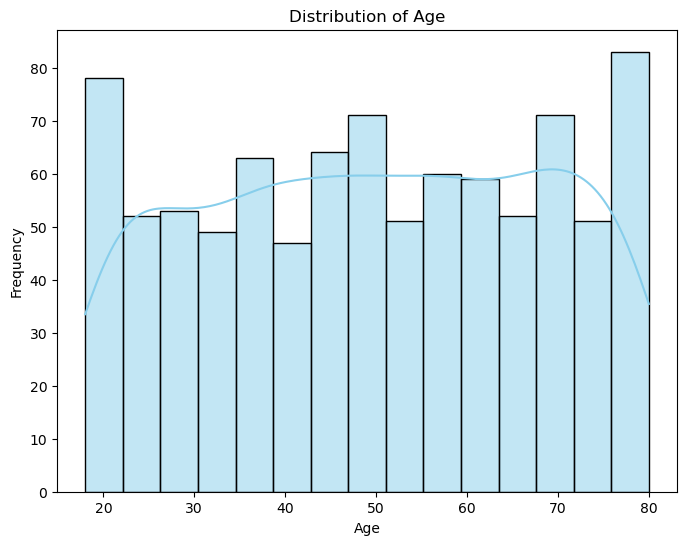

In [22]:
# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(IM_df['Age'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [23]:
IM_df['Age'].skew()

-0.04777765747660836

In [24]:
IM_df['Age'].fillna(math.ceil(IM_df['Age'].mean()), inplace=True) 

In [25]:
IM_df['Age'].isna().sum()

0

In [26]:
IM_df[IM_df['Age'] == IM_df['Age'].mean()]

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season


### Working with Gender

In [27]:
IM_df['Gender'].describe()

count       940
unique        5
top       Other
freq        320
Name: Gender, dtype: object

In [28]:
# updated after combining empty string and hidden in Other
IM_df['Gender'].value_counts()

Other     320
Female    297
Male      278
           31
Hidden     14
Name: Gender, dtype: int64

In [29]:
IM_df['Gender'].mode()

0    Other
Name: Gender, dtype: object

In [30]:
# As the Gender is categorical data. So we will fill the non-empty string and hidden with the mode which is Other
IM_df['Gender'].replace({'' : np.nan, 'Hidden' : np.nan}, inplace=True)

In [31]:
IM_df['Gender'].fillna(method='ffill', inplace=True)

In [32]:
IM_df['Gender'].value_counts()

Other     339
Female    311
Male      290
Name: Gender, dtype: int64

### Working with Income_Level

In [33]:
IM_df['Income_Level'].describe()

count        940
unique         5
top       Medium
freq         323
Name: Income_Level, dtype: object

In [34]:
IM_df['Income_Level'].value_counts()

Medium    323
Low       287
High      283
           38
Hidden      9
Name: Income_Level, dtype: int64

In [35]:
IM_df['Income_Level'].replace({'': np.nan, 'Hidden': np.nan}, inplace=True)

In [36]:
IM_df['Income_Level'].value_counts()

Medium    323
Low       287
High      283
Name: Income_Level, dtype: int64

In [37]:
IM_df['Income_Level'].isna().sum()

47

In [38]:
IM_df['Income_Level'].fillna(method='ffill', inplace=True)

### Working with Address

### Working with Transaction_ID

In [39]:
IM_df['Transaction_ID'].info()

<class 'pandas.core.series.Series'>
Int64Index: 940 entries, 0 to 999
Series name: Transaction_ID
Non-Null Count  Dtype 
--------------  ----- 
940 non-null    object
dtypes: object(1)
memory usage: 14.7+ KB


In [40]:
IM_df['Transaction_ID'].value_counts()

                                        36
Hidden                                  11
6c1847c4-c084-4233-92fb-36274467c80e     1
ca7301a2-569e-4fc6-bef3-cbb6ba851b63     1
312a3df3-5e14-46ac-9965-c123358d00c1     1
                                        ..
7bbc5e77-4931-45db-96f2-f9478dd5b11a     1
58f5298b-f4aa-4165-b9d2-15bc141c537a     1
26ca4c7c-8a70-459b-b69c-26c4030c6940     1
73aca7a8-9645-401a-bac7-87b38631a6e5     1
69afa592-2658-48ac-9b37-33a3a473d0be     1
Name: Transaction_ID, Length: 895, dtype: int64

In [41]:
IM_df['Transaction_ID'].replace({'':np.nan, 'Hidden': np.nan}, inplace=True)

In [42]:
IM_df['Transaction_ID'].value_counts()

c6a6c712-e36b-406a-bfde-f53bdcf4744f    1
e5a0f70d-503d-4b92-ab52-48ae5f49a046    1
312a3df3-5e14-46ac-9965-c123358d00c1    1
cf466f34-add0-4f2e-a173-c22257a2aa3e    1
8d16fbf9-34c5-4705-ba3b-3ab63b31884e    1
                                       ..
7bbc5e77-4931-45db-96f2-f9478dd5b11a    1
58f5298b-f4aa-4165-b9d2-15bc141c537a    1
26ca4c7c-8a70-459b-b69c-26c4030c6940    1
73aca7a8-9645-401a-bac7-87b38631a6e5    1
69afa592-2658-48ac-9b37-33a3a473d0be    1
Name: Transaction_ID, Length: 893, dtype: int64

In [43]:
#IM_df[IM_df['Transaction_ID'].isna()]
IM_df['Transaction_ID'].isna().sum()

47

In [44]:
IM_df['Transaction_ID'].fillna(method='ffill', inplace=True)

In [45]:
IM_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    940 non-null    object 
 1   Age                            940 non-null    float64
 2   Gender                         940 non-null    object 
 3   Income_Level                   940 non-null    object 
 4   Address                        940 non-null    object 
 5   Transaction_ID                 940 non-null    object 
 6   Purchase_Date                  940 non-null    object 
 7   Product_ID                     940 non-null    object 
 8   Product_Category               940 non-null    object 
 9   Brand                          940 non-null    object 
 10  Purchase_Amount                940 non-null    object 
 11  Average_Spending_Per_Purchase  940 non-null    object 
 12  Purchase_Frequency_Per_Month   940 non-null    obj

### Working with Purchase Date

In [46]:
IM_df['Purchase_Date'].describe()

count     940
unique    673
top          
freq       33
Name: Purchase_Date, dtype: object

In [47]:
IM_df['Purchase_Date'].value_counts()

              33
Hidden        10
2020-03-04     4
2023-11-19     4
2023-03-01     4
              ..
2021-11-24     1
2021-02-25     1
2021-03-29     1
2023-05-29     1
2022-09-13     1
Name: Purchase_Date, Length: 673, dtype: int64

In [48]:
# first converting Purchase_Date to Datetime
IM_df['Purchase_Date'] = pd.to_datetime(IM_df['Purchase_Date'], errors='coerce')

In [49]:
# 35 + 13   = 48 will be replaced by NAN
IM_df['Purchase_Date'].replace({'' : pd.NaT, 'Hidden': pd.NaT}, inplace=True)

In [50]:
IM_df['Purchase_Date'].isna().sum()

43

In [51]:
IM_df = IM_df.sort_values(by='Purchase_Date')
IM_df['Purchase_Date'].fillna(method='ffill', inplace=True)

### Working with Brand

In [52]:
IM_df['Brand'].describe()

count         940
unique          5
top       Brand_C
freq          323
Name: Brand, dtype: object

In [53]:
IM_df['Brand'].info()

<class 'pandas.core.series.Series'>
Int64Index: 940 entries, 899 to 984
Series name: Brand
Non-Null Count  Dtype 
--------------  ----- 
940 non-null    object
dtypes: object(1)
memory usage: 14.7+ KB


In [54]:
IM_df['Brand'].value_counts()

Brand_C    323
Brand_B    286
Brand_A    275
            44
Hidden      12
Name: Brand, dtype: int64

In [55]:
# to avoid to skew towards one brand most occurring which Brand_C, we introduced the Category No Brand Mentioned. So, integrity will also be maintained of original data
IM_df['Brand'].replace({'': np.nan, 'Hidden' : np.nan}, inplace=True)

In [56]:
IM_df['Brand'].value_counts()

Brand_C    323
Brand_B    286
Brand_A    275
Name: Brand, dtype: int64

In [57]:
IM_df['Brand'].isna().sum()

56

In [58]:
IM_df['Brand'].fillna(method='ffill', inplace=True)

In [59]:
IM_df['Brand'].value_counts()

Brand_C    335
Brand_B    307
Brand_A    297
Name: Brand, dtype: int64

In [60]:
IM_df['Brand'].fillna(IM_df['Brand'].mode()[0], inplace=True)

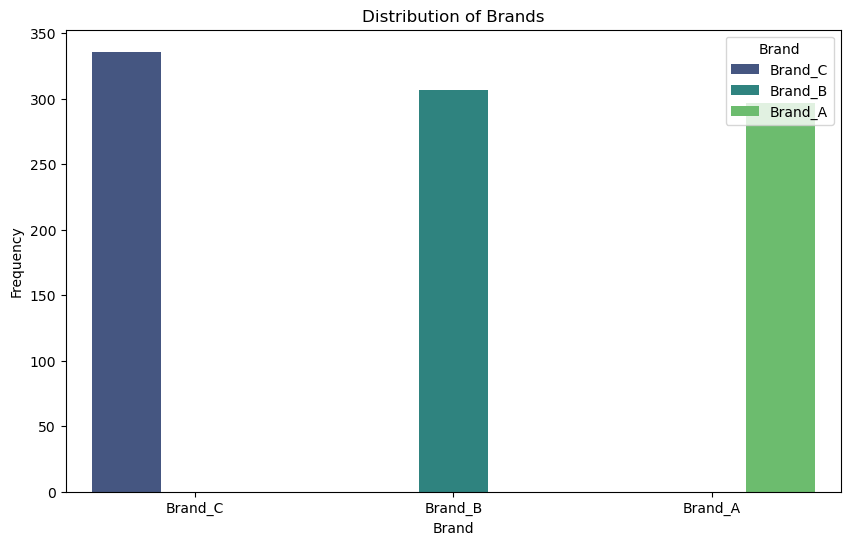

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(data=IM_df, x='Brand', hue='Brand', palette='viridis')
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.show()

### Working with Purchase_Amount

In [62]:
IM_df['Purchase_Amount'].describe()

count     940
unique    409
top          
freq       31
Name: Purchase_Amount, dtype: object

In [63]:
IM_df['Purchase_Amount'].info()

<class 'pandas.core.series.Series'>
Int64Index: 940 entries, 899 to 984
Series name: Purchase_Amount
Non-Null Count  Dtype 
--------------  ----- 
940 non-null    object
dtypes: object(1)
memory usage: 14.7+ KB


In [64]:
IM_df['Purchase_Amount'].value_counts()

          31
Hidden    14
39         8
19         6
390        6
          ..
430        1
431        1
76         1
498        1
258        1
Name: Purchase_Amount, Length: 409, dtype: int64

In [65]:
# first converting its data type to zero
IM_df['Purchase_Amount'] = pd.to_numeric(IM_df['Purchase_Amount'], errors='coerce')

In [66]:
IM_df['Purchase_Amount'].value_counts()

39.0     8
390.0    6
19.0     6
111.0    5
222.0    5
        ..
430.0    1
431.0    1
76.0     1
498.0    1
258.0    1
Name: Purchase_Amount, Length: 407, dtype: int64

In [67]:
IM_df['Purchase_Amount'].isna().sum()

45

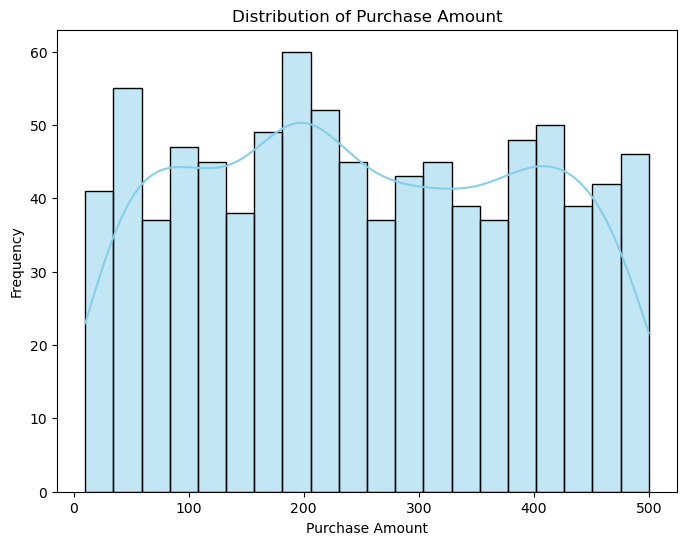

In [68]:
plt.figure(figsize=(8, 6))
sns.histplot(IM_df['Purchase_Amount'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

In [69]:
IM_df['Purchase_Amount'].describe()

count    895.000000
mean     251.513966
std      141.229990
min       10.000000
25%      132.000000
50%      248.000000
75%      378.500000
max      500.000000
Name: Purchase_Amount, dtype: float64

In [70]:
print(IM_df['Purchase_Amount'].mean())
print(IM_df['Purchase_Amount'].median())

251.51396648044692
248.0


In [71]:
IM_df['Purchase_Amount'].skew()

0.04719861149911288

In [72]:
IM_df['Purchase_Amount'].fillna(math.ceil(IM_df['Purchase_Amount'].mean()), inplace=True)

In [73]:
IM_df['Purchase_Amount'].value_counts()

252.0    49
39.0      8
19.0      6
390.0     6
400.0     5
         ..
33.0      1
236.0     1
471.0     1
193.0     1
258.0     1
Name: Purchase_Amount, Length: 407, dtype: int64

### Working with Average_Spending_Per_Purchase

In [74]:
IM_df['Average_Spending_Per_Purchase'].describe()

count     940
unique     98
top          
freq       24
Name: Average_Spending_Per_Purchase, dtype: object

In [75]:
IM_df['Average_Spending_Per_Purchase'].info()

<class 'pandas.core.series.Series'>
Int64Index: 940 entries, 899 to 984
Series name: Average_Spending_Per_Purchase
Non-Null Count  Dtype 
--------------  ----- 
940 non-null    object
dtypes: object(1)
memory usage: 14.7+ KB


In [76]:
IM_df['Average_Spending_Per_Purchase'].value_counts()

      24
71    16
39    15
46    15
35    15
      ..
85     5
86     5
62     5
31     4
90     4
Name: Average_Spending_Per_Purchase, Length: 98, dtype: int64

In [77]:
# first converting its data type to int64
IM_df['Average_Spending_Per_Purchase'] = pd.to_numeric(IM_df['Average_Spending_Per_Purchase'], errors='coerce')

In [78]:
IM_df['Average_Spending_Per_Purchase'].value_counts()

71.0    16
46.0    15
39.0    15
99.0    15
35.0    15
        ..
86.0     5
70.0     5
85.0     5
31.0     4
90.0     4
Name: Average_Spending_Per_Purchase, Length: 96, dtype: int64

In [79]:
IM_df['Average_Spending_Per_Purchase'].isna().sum()

38

In [80]:
IM_df['Average_Spending_Per_Purchase'].skew()

0.10650214020865188

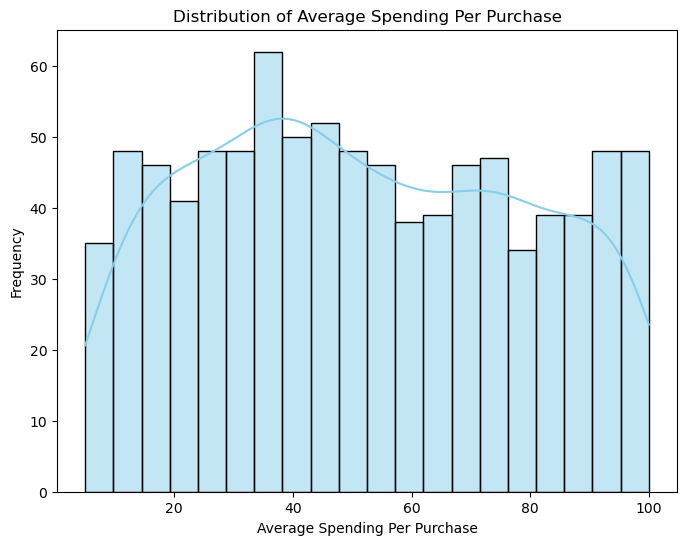

In [81]:
plt.figure(figsize=(8, 6))
sns.histplot(IM_df['Average_Spending_Per_Purchase'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Average Spending Per Purchase')
plt.xlabel('Average Spending Per Purchase')
plt.ylabel('Frequency')
plt.show()

In [82]:
IM_df['Average_Spending_Per_Purchase'].describe()

count    902.000000
mean      51.767184
std       27.086148
min        5.000000
25%       29.000000
50%       50.000000
75%       74.000000
max      100.000000
Name: Average_Spending_Per_Purchase, dtype: float64

In [83]:
print(IM_df['Average_Spending_Per_Purchase'].mean())
print(IM_df['Average_Spending_Per_Purchase'].median())

51.76718403547672
50.0


In [84]:
# as the difference between the median and mean is also not very much. So, we will be going with the mean due to the low skewness
IM_df['Average_Spending_Per_Purchase'].fillna(math.ceil(IM_df['Average_Spending_Per_Purchase'].mean()), inplace=True)

### Working with Purchase Frequency Per Month

In [85]:
IM_df['Purchase_Frequency_Per_Month'].info()

<class 'pandas.core.series.Series'>
Int64Index: 940 entries, 899 to 984
Series name: Purchase_Frequency_Per_Month
Non-Null Count  Dtype 
--------------  ----- 
940 non-null    object
dtypes: object(1)
memory usage: 14.7+ KB


In [86]:
IM_df['Purchase_Frequency_Per_Month'].describe()

count     940
unique     12
top         3
freq      107
Name: Purchase_Frequency_Per_Month, dtype: object

In [87]:
IM_df['Purchase_Frequency_Per_Month'].value_counts()

3         107
2         105
10         93
6          91
5          91
8          91
9          84
4          81
7          75
1          70
           36
Hidden     16
Name: Purchase_Frequency_Per_Month, dtype: int64

In [88]:
# first we will convert the Purchase Frequency Per Month to int64
IM_df['Purchase_Frequency_Per_Month'] = pd.to_numeric(IM_df['Purchase_Frequency_Per_Month'], errors='coerce')

In [89]:
IM_df['Purchase_Frequency_Per_Month'].value_counts()

3.0     107
2.0     105
10.0     93
6.0      91
5.0      91
8.0      91
9.0      84
4.0      81
7.0      75
1.0      70
Name: Purchase_Frequency_Per_Month, dtype: int64

In [90]:
IM_df['Purchase_Frequency_Per_Month'].describe()

count    888.000000
mean       5.478604
std        2.858874
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Purchase_Frequency_Per_Month, dtype: float64

In [91]:
IM_df['Purchase_Frequency_Per_Month'].isna().sum()

52

In [92]:
IM_df['Purchase_Frequency_Per_Month'].skew()

0.06724718635369081

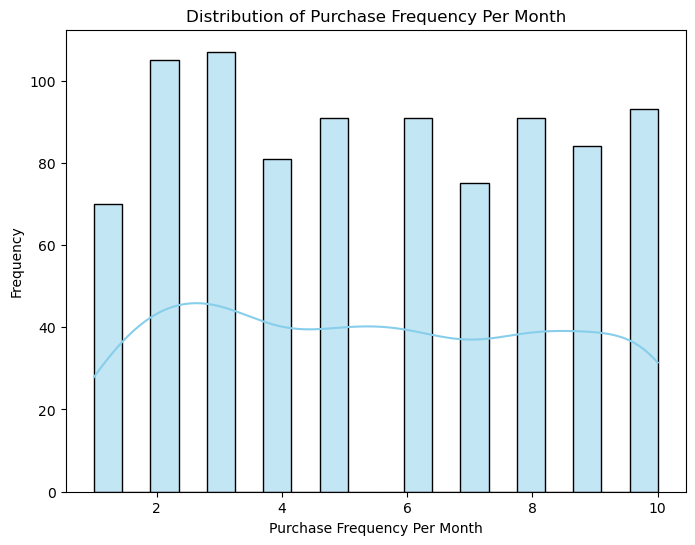

In [93]:
plt.figure(figsize=(8, 6))
sns.histplot(IM_df['Purchase_Frequency_Per_Month'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Purchase Frequency Per Month')
plt.xlabel('Purchase Frequency Per Month')
plt.ylabel('Frequency')
plt.show()

In [94]:
print(IM_df['Purchase_Frequency_Per_Month'].mean())
print(IM_df['Purchase_Frequency_Per_Month'].median())

5.478603603603603
5.0


In [95]:
# as the skew is low, so considering the mean here beacuse the max value is also not so extreme which is 10 in this case
# the mean and median difference is also not to evident
#IM_df['Purchase_Frequency_Per_Month'].replace({0:5}, inplace=True)

IM_df['Purchase_Frequency_Per_Month'].fillna(math.floor(IM_df['Purchase_Frequency_Per_Month'].mean()), inplace=True)

In [96]:
IM_df['Purchase_Frequency_Per_Month'].value_counts()

5.0     143
3.0     107
2.0     105
10.0     93
6.0      91
8.0      91
9.0      84
4.0      81
7.0      75
1.0      70
Name: Purchase_Frequency_Per_Month, dtype: int64

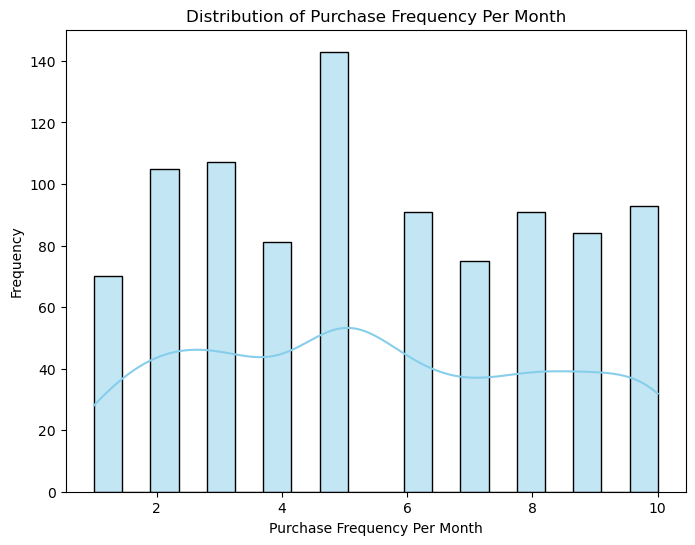

In [97]:
plt.figure(figsize=(8, 6))
sns.histplot(IM_df['Purchase_Frequency_Per_Month'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Purchase Frequency Per Month')
plt.xlabel('Purchase Frequency Per Month')
plt.ylabel('Frequency')
plt.show()

### Working with Brand_Affinity_Score

In [98]:
IM_df['Brand_Affinity_Score'].info()

<class 'pandas.core.series.Series'>
Int64Index: 940 entries, 899 to 984
Series name: Brand_Affinity_Score
Non-Null Count  Dtype 
--------------  ----- 
940 non-null    object
dtypes: object(1)
memory usage: 14.7+ KB


In [99]:
IM_df['Brand_Affinity_Score'].describe()

count     940
unique     12
top         2
freq      102
Name: Brand_Affinity_Score, dtype: object

In [100]:
IM_df['Brand_Affinity_Score'].value_counts()

2         102
6          98
8          97
3          91
5          88
1          86
4          85
10         84
7          77
9          76
           44
Hidden     12
Name: Brand_Affinity_Score, dtype: int64

In [101]:
# Now converting the datatype from object to int64
# first we will convert the Purchase Frequency Per Month to int64
IM_df['Brand_Affinity_Score'] = pd.to_numeric(IM_df['Brand_Affinity_Score'], errors='coerce')

In [102]:
IM_df['Brand_Affinity_Score'].describe()

count    884.000000
mean       5.395928
std        2.855411
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Brand_Affinity_Score, dtype: float64

In [103]:
IM_df['Brand_Affinity_Score'].value_counts()

2.0     102
6.0      98
8.0      97
3.0      91
5.0      88
1.0      86
4.0      85
10.0     84
7.0      77
9.0      76
Name: Brand_Affinity_Score, dtype: int64

In [104]:
IM_df['Brand_Affinity_Score'].isna().sum()

56

In [105]:
IM_df['Brand_Affinity_Score'].skew()

0.0497191999036016

In [106]:
print(IM_df['Brand_Affinity_Score'].mean())
print(IM_df['Brand_Affinity_Score'].median())

5.395927601809955
5.0


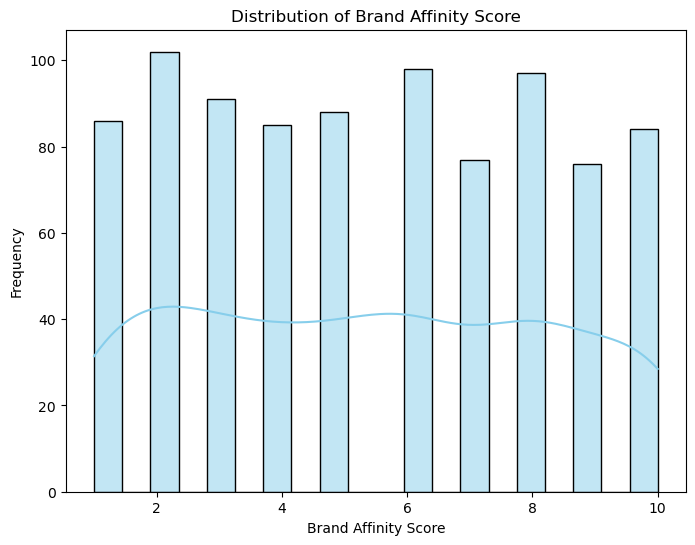

In [107]:
plt.figure(figsize=(8, 6))
sns.histplot(IM_df['Brand_Affinity_Score'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Brand Affinity Score')
plt.xlabel('Brand Affinity Score')
plt.ylabel('Frequency')
plt.show()

In [108]:
# as it is evident from the hisplot that the data is symmetrical, so that mean is better option. Also, the difference between the mean and median is also not much
IM_df['Brand_Affinity_Score'].fillna(math.floor(IM_df['Brand_Affinity_Score'].mean()), inplace=True)

In [109]:
IM_df['Brand_Affinity_Score'].value_counts()

5.0     144
2.0     102
6.0      98
8.0      97
3.0      91
1.0      86
4.0      85
10.0     84
7.0      77
9.0      76
Name: Brand_Affinity_Score, dtype: int64

In [110]:
IM_df['Brand_Affinity_Score'] = IM_df['Brand_Affinity_Score'].astype('Int64')

### Working with Product_Category_Preferences

In [111]:
IM_df['Product_Category_Preferences'].describe()

count     940
unique      5
top       Low
freq      315
Name: Product_Category_Preferences, dtype: object

In [112]:
IM_df['Product_Category_Preferences'].value_counts()

Low       315
Medium    298
High      287
           28
Hidden     12
Name: Product_Category_Preferences, dtype: int64

In [113]:
# so intoducing the new category here, not going with the mode beacuse if some customers have keep it hidden it is due to some cause. Replacing Empty
# String and Hidden witht he mode will create the biasness so that to maintain the integrity of the data, we replaced with 'No Preference'
IM_df['Product_Category_Preferences'].replace({'': np.nan, 'Hidden': np.nan}, inplace=True)

In [114]:
IM_df['Product_Category_Preferences'].value_counts()

Low       315
Medium    298
High      287
Name: Product_Category_Preferences, dtype: int64

In [115]:
IM_df['Product_Category_Preferences'].fillna(method='ffill', inplace=True)

In [116]:
IM_df['Product_Category_Preferences'].value_counts()

Low       325
Medium    314
High      301
Name: Product_Category_Preferences, dtype: int64

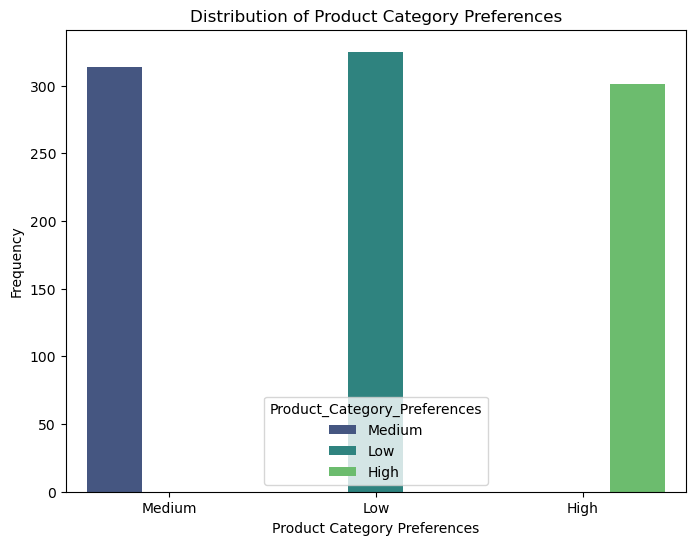

In [117]:
plt.figure(figsize=(8, 6))
sns.countplot(data=IM_df, x='Product_Category_Preferences', hue='Product_Category_Preferences', palette='viridis')
plt.title('Distribution of Product Category Preferences')
plt.xlabel('Product Category Preferences')
plt.ylabel('Frequency')
plt.show()

### Working with Month

In [118]:
IM_df['Month'].info()

<class 'pandas.core.series.Series'>
Int64Index: 940 entries, 899 to 984
Series name: Month
Non-Null Count  Dtype 
--------------  ----- 
940 non-null    object
dtypes: object(1)
memory usage: 14.7+ KB


In [119]:
IM_df['Month'].describe()

count     940
unique     14
top        04
freq       90
Name: Month, dtype: object

In [120]:
IM_df['Month'].value_counts()

04        90
09        87
05        79
11        79
10        79
12        73
06        71
03        71
02        70
01        66
07        66
08        58
          39
Hidden    12
Name: Month, dtype: int64

In [121]:
# convert Months to int64
IM_df['Month'] = pd.to_numeric(IM_df['Month'], errors='coerce')
IM_df['Month'] = IM_df['Month'].replace('', pd.NA)
IM_df['Month'] = IM_df['Month'].astype('Int64')

In [122]:
IM_df['Month'].describe()

count    889.000000
mean       6.573678
std        3.439212
min        1.000000
25%        4.000000
50%        6.000000
75%       10.000000
max       12.000000
Name: Month, dtype: float64

In [123]:
IM_df['Month'].value_counts()

4     90
9     87
5     79
11    79
10    79
12    73
6     71
3     71
2     70
1     66
7     66
8     58
Name: Month, dtype: Int64

In [124]:
IM_df['Month'].fillna(method='ffill', inplace=True)

In [125]:
IM_df['Month'].value_counts()

4     98
9     92
11    88
10    84
5     81
12    76
3     75
2     74
6     73
1     70
7     70
8     59
Name: Month, dtype: Int64

### Working with Year

In [126]:
IM_df['Year'].value_counts()

          35
1995      26
2017      24
2014      23
1983      23
1974      22
1985      22
2015      21
1981      21
1991      21
1990      21
1978      21
2016      20
2011      20
2003      20
2022      19
2023      19
1989      19
2001      19
2010      18
1998      18
2008      18
1988      18
2005      18
1996      18
2013      17
2000      17
1970      17
1986      17
2004      16
1972      16
2012      15
2002      15
1993      15
2021      15
1980      15
2007      14
2019      14
1982      14
2006      14
1977      14
1999      14
2018      13
1976      13
1987      13
1971      12
Hidden    12
1997      12
1975      12
2020      12
1979      11
1973      11
1984      11
1994      11
1992       8
2009       6
Name: Year, dtype: int64

In [127]:
IM_df['Year'].describe()

count     940
unique     56
top          
freq       35
Name: Year, dtype: object

In [128]:
IM_df['Year'] = pd.to_numeric(IM_df['Year'], errors='coerce')
IM_df['Year'] = IM_df['Year'].replace(0, pd.NA)
IM_df['Year'] = IM_df['Year'].astype('Int64')

In [129]:
IM_df['Year'].describe()

count     893.000000
mean     1996.993281
std        15.487300
min      1970.000000
25%      1984.000000
50%      1997.000000
75%      2011.000000
max      2023.000000
Name: Year, dtype: float64

In [130]:
min_year = IM_df['Year'].min()
max_year = IM_df['Year'].max()

print(f"Minimum Year: {min_year}")
print(f"Maximum Year: {max_year}")

Minimum Year: 1970
Maximum Year: 2023


In [131]:
IM_df['Year'].skew()

-0.021186611924670265

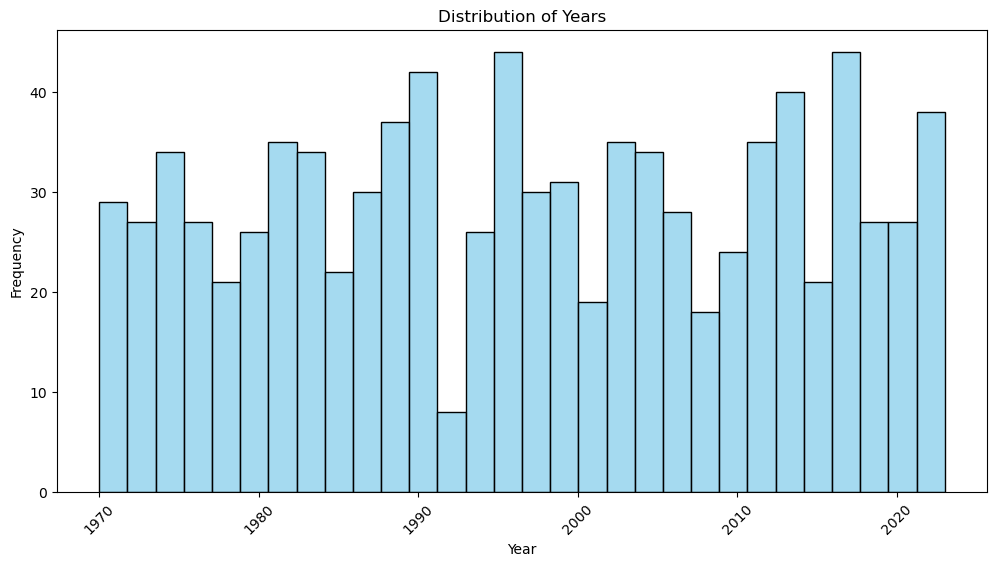

In [132]:
plt.figure(figsize=(12, 6))
sns.histplot(IM_df['Year'], bins=30, color='skyblue', kde=False)
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()

In [133]:
IM_df['Year'].fillna(method='ffill', inplace=True)

In [134]:
IM_df['Year'].value_counts()

1995    28
2017    25
1990    24
1974    24
2016    23
2014    23
1983    23
2015    22
1985    22
2003    21
1978    21
1991    21
2022    21
1981    21
1989    20
2011    20
2001    20
1988    20
1996    20
2023    20
1998    19
2010    19
2008    19
2000    18
2005    18
1972    18
2013    18
1986    17
1970    17
1999    16
2004    16
1980    16
2021    16
2002    15
1993    15
2007    15
1997    15
1982    15
2019    15
2012    15
1977    14
1976    14
1987    14
2006    14
1971    13
2020    13
2018    13
1984    13
1975    12
1973    12
1979    11
1994    11
1992     8
2009     7
Name: Year, dtype: Int64

In [135]:
IM_df['Year'].skew()

-0.021644636346583503

### Working with Season

In [136]:
IM_df['Season'].value_counts()

Fall      230
Spring    224
Winter    222
Summer    221
           33
Hidden     10
Name: Season, dtype: int64

In [137]:
grouped_seasons = IM_df.groupby('Season')['Month'].value_counts()


In [138]:
grouped_seasons.head()

Season  Month
        9        6
        11       4
        12       4
        2        3
        4        3
Name: Month, dtype: int64

In [139]:
IM_df[IM_df['Month'] == 12]

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
414,228febfa-bfb5-413a-ab8a-1eeb905b36fd,40.0,Female,Low,"50568 Joseph Prairie\nPort Kimberlyview, ND 33279",96375f25-2e13-4e66-8e76-bbbf06760439,2020-01-04,aab09f53-a4a1-400e-932f-62120350545b,Electronics,Brand_B,407.0,50.0,9.0,6,High,12,1999,Fall
69,27697d58-bf22-4540-8e31-5aa8084b52da,55.0,Male,Low,"566 Christensen Cove\nKramertown, AZ 94038",0b806ed3-4f00-493c-a47d-f894aa481fd7,2020-02-04,,Clothing,Brand_B,465.0,35.0,5.0,7,Low,12,1980,Winter
595,6ceddb48-ed62-46e1-8c56-15953d05780c,37.0,Other,Low,"7130 Frank Manors\nDanielsland, NH 01025",e2425890-8af8-437e-be04-1e875ff72657,2020-03-02,1dfad74a-1784-4c73-ad0f-272d41e58998,Electronics,Brand_B,364.0,35.0,3.0,6,Low,12,2012,Winter
239,4d70ef0b-017c-46c4-89cf-427f7b06eb7e,58.0,Female,Low,"7787 Cassidy Mission\nPort Holly, LA 65576",dee437b5-d303-4b59-aa7d-6b5eaa011df0,2020-04-06,2243ccd1-ca32-45e9-977a-a637113f64a8,Electronics,Brand_A,25.0,31.0,4.0,8,High,12,2008,Spring
898,63a9340c-9855-4c5d-8b78-a045d5c35da5,34.0,Other,High,"555 Natalie Club\nNorth Kevinmouth, CO 26938",4d6e00d2-d021-4a87-a8bf-ebbf63762828,2020-04-08,407b2821-e44e-4131-94ea-4e45c97113c2,Clothing,Brand_A,20.0,39.0,2.0,8,Medium,12,1980,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,bbf71022-0a19-43d5-bc6b-64520733a9d7,61.0,Other,Medium,"9771 Chad Neck\nChristopherfort, ND 80772",6699d692-c47f-44fe-90de-230ca41295df,2023-12-01,5c58e0b5-2e2b-47a4-8445-3016a4b8ae76,Clothing,Brand_A,133.0,62.0,5.0,3,Medium,12,2010,Spring
157,25603aba-23fe-4d29-b66d-af67d7329905,56.0,Other,Low,"481 Blevins Union Suite 508\nNew Natasha, MN 3...",2859eaee-8a09-4081-b774-42de56ca61f4,2023-12-01,65766243-9761-43c3-b31c-aed21afcc493,Books,Brand_A,298.0,71.0,4.0,4,Low,12,1973,Spring
394,66331815-2963-4c73-9d89-fdbe94db29a4,48.0,Male,Low,733 Harrington Mountain Apt. 623\nWest Paigevi...,7408b339-6b60-49de-8053-2000810215d1,2023-12-01,ffe5876b-d64d-40b3-a52a-9e90f19b3404,Electronics,Brand_A,211.0,71.0,9.0,10,Low,12,1971,Winter
446,60d2c3db-4c91-4e54-908a-9e9d1c01cda4,68.0,Female,Low,"5890 April Valleys Suite 150\nNew Jamiefurt, P...",02d8c6c9-36eb-4377-ae8e-ad2a5e91a049,2023-12-01,328e72a6-4a42-48ce-b3d1-5536ee1441c8,Electronics,Brand_B,484.0,11.0,8.0,2,Low,12,1995,Summer


In [140]:
IM_df['Season'].replace({'': pd.NA, 'Hidden': pd.NA}, inplace=True)

In [141]:
IM_df['Season'].isna().sum()

43

In [142]:
# so as evident from above like in Year 2006 month 12 it was fall, and in year 2010 it is Spring. 
# so we will create a simple months dictionary and based on it we will fill the missing value with that Season

month_season_dictionary = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 
    11: 'Winter', 12: 'Winter'
}

IM_df['Season'].fillna(IM_df['Month'].map(month_season_dictionary), inplace=True)

In [143]:
IM_df['Season'].value_counts()

Fall      238
Winter    238
Spring    234
Summer    230
Name: Season, dtype: int64

In [144]:
IM_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 899 to 984
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    940 non-null    object        
 1   Age                            940 non-null    float64       
 2   Gender                         940 non-null    object        
 3   Income_Level                   940 non-null    object        
 4   Address                        940 non-null    object        
 5   Transaction_ID                 940 non-null    object        
 6   Purchase_Date                  940 non-null    datetime64[ns]
 7   Product_ID                     940 non-null    object        
 8   Product_Category               940 non-null    object        
 9   Brand                          940 non-null    object        
 10  Purchase_Amount                940 non-null    float64       
 11  Average_Spending_

In [145]:
IM_df.head()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
899,a73774fe-d420-46ca-8a43-44eb51438f5e,48.0,Other,High,1412 Blake Parkway Apt. 316\nLake Rodneycheste...,c1cba058-2afd-41e4-826c-ea03c51afaad,2020-01-02,1c72a791-7b4d-4f7d-960e-7a611428a870,Books,Brand_C,424.0,43.0,6.0,5,Medium,5,1994,Fall
788,8f25e25c-75c7-4eb7-b2e2-f708dee8ef13,39.0,Female,Low,414 Lauren Mountain Suite 243\nSouth Jessicabe...,638cded1-9504-4fc9-a1e1-09ee49388c8e,2020-01-03,495c76ec-35f1-4b80-86b5-b91558ffb2a5,Electronics,Brand_C,428.0,92.0,1.0,7,Low,1,2001,Winter
414,228febfa-bfb5-413a-ab8a-1eeb905b36fd,40.0,Female,Low,"50568 Joseph Prairie\nPort Kimberlyview, ND 33279",96375f25-2e13-4e66-8e76-bbbf06760439,2020-01-04,aab09f53-a4a1-400e-932f-62120350545b,Electronics,Brand_B,407.0,50.0,9.0,6,High,12,1999,Fall
160,09427631-943f-4427-80e6-79c9da0c2613,71.0,Other,High,"4363 Leslie Hills\nLake Mary, FL 20948",be33a103-bf30-4787-ad68-54a3efc8d675,2020-01-05,6cb25dba-2dd1-4724-84d0-322497ead674,Clothing,Brand_B,381.0,42.0,5.0,8,Low,9,1999,Spring
389,d8fbc8d7-7b8a-4903-85b7-630519ab33d7,40.0,Male,Low,"0114 Jacob Passage Suite 324\nAmandastad, NV 1...",fa0db7eb-2748-4e3d-95dc-8bf48c5dac5f,2020-01-07,878b2b79-6f19-4162-9164-953af3f6e903,Books,Brand_C,451.0,53.0,9.0,9,Low,5,2015,Winter


In [146]:
IM_K_DF = IM_df

### Module 2: Exploratory Data Analysis(EDA)

### Univariate Analysis:
### Histogram: Customer Age, Purchase Amount, Purchase Frequency Per Month
### BoxPlots: Customer Age, Purchase Amount, Purchase Frequency Per Month
### Descriptive Analysis: Customer Age, Purchase Amount, Purchase Frequency Per Month

### For Electronics

In [147]:


EIM_df = IM_df[IM_df['Product_Category'] == 'Electronics']
EIM_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 788 to 925
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    355 non-null    object        
 1   Age                            355 non-null    float64       
 2   Gender                         355 non-null    object        
 3   Income_Level                   355 non-null    object        
 4   Address                        355 non-null    object        
 5   Transaction_ID                 355 non-null    object        
 6   Purchase_Date                  355 non-null    datetime64[ns]
 7   Product_ID                     355 non-null    object        
 8   Product_Category               355 non-null    object        
 9   Brand                          355 non-null    object        
 10  Purchase_Amount                355 non-null    float64       
 11  Average_Spending_

In [148]:
EIM_df['Product_Category'].value_counts()

Electronics    355
Name: Product_Category, dtype: int64

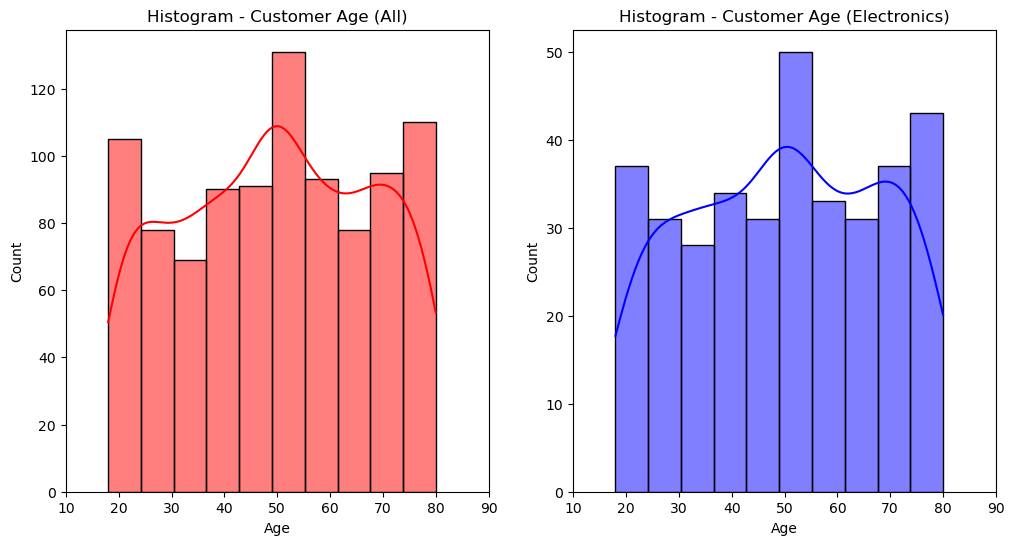

In [149]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.histplot(IM_df['Age'], kde=True, color='red', bins=10)
plt.title('Histogram - Customer Age (All)')
plt.xlim(10, 90)
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(EIM_df['Age'], kde=True, color='blue', bins=10)
plt.title('Histogram - Customer Age (Electronics)')
plt.xlim(10, 90)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

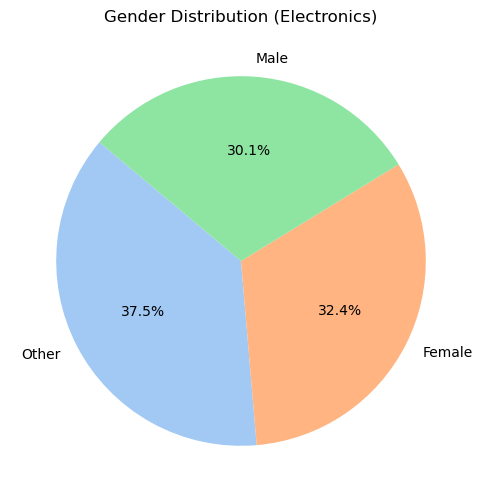

In [150]:
gender_counts = EIM_df['Gender'].value_counts()
colors = sns.color_palette('pastel')
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Gender Distribution (Electronics)')
plt.show()

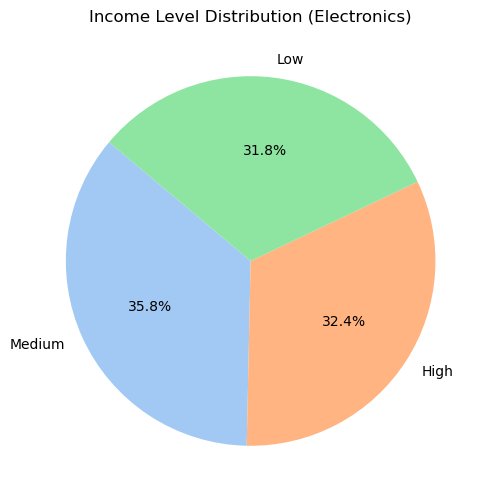

In [151]:
income_counts = EIM_df['Income_Level'].value_counts()
colors = sns.color_palette('pastel')
plt.figure(figsize=(6, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Income Level Distribution (Electronics)')
plt.show()

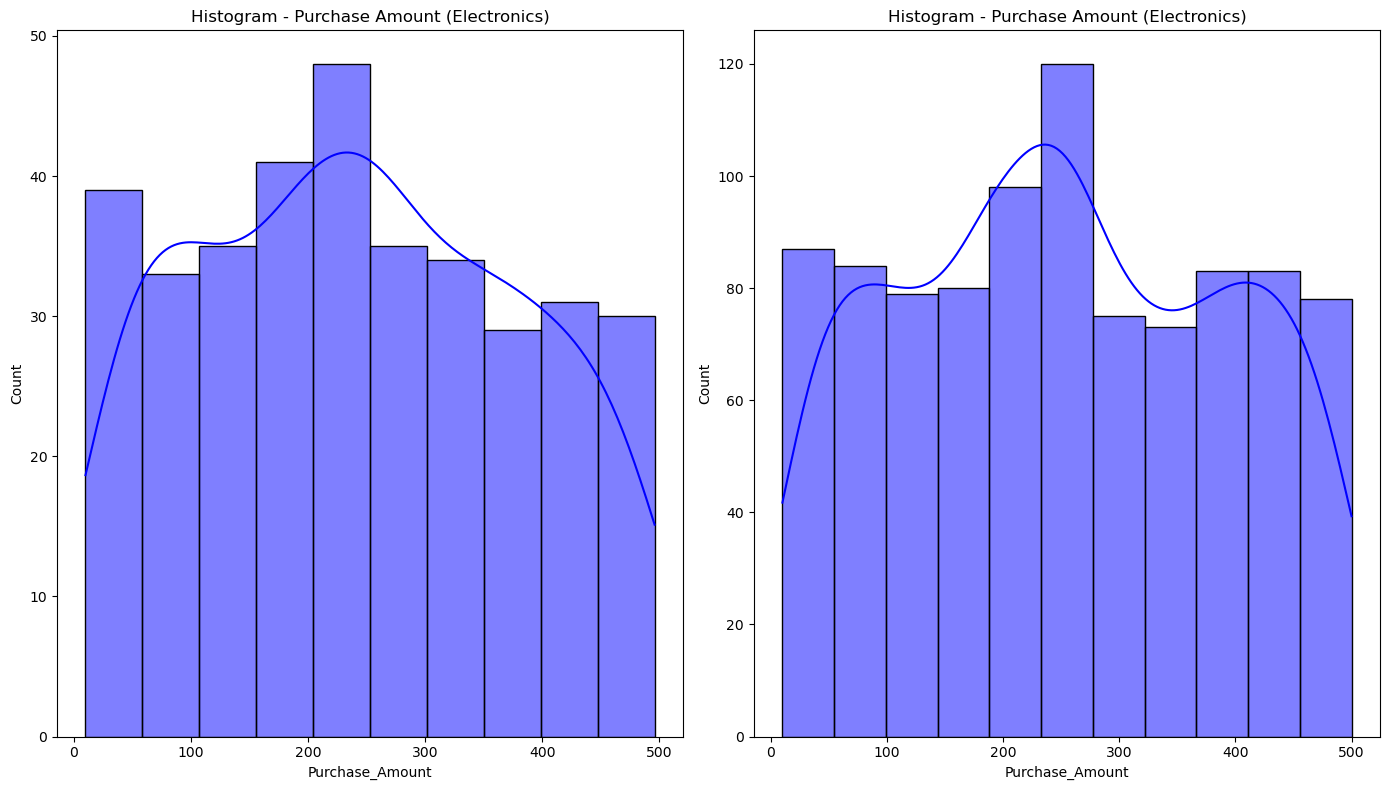

In [152]:
plt.figure(figsize=(14, 8))

# for purchase_amount
plt.subplot(1, 2, 1)
sns.histplot(EIM_df['Purchase_Amount'], kde=True, color='blue')
plt.title('Histogram - Purchase Amount (Electronics)')

# for purchase_frequency_per_month
plt.subplot(1, 2, 2)
sns.histplot(IM_df['Purchase_Amount'], kde=True, color='blue')
plt.title('Histogram - Purchase Amount (Electronics)')

plt.tight_layout()
plt.show()

### For Whole Data

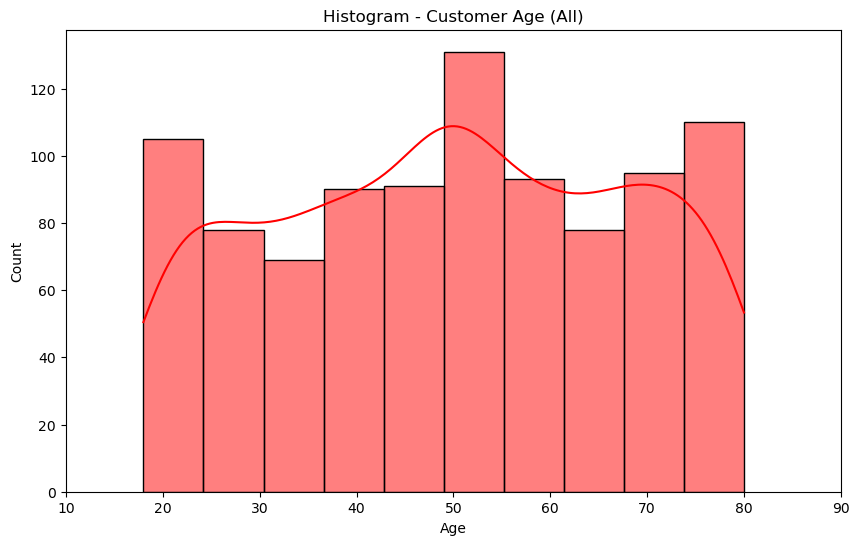

In [153]:
plt.figure(figsize=(10,6))

sns.histplot(IM_df['Age'], kde=True, color='red', bins=10)
plt.title('Histogram - Customer Age (All)')
plt.xlim(10, 90)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Histogram for Customer Age, Purchase Amount, and Purchase Frequency Per Month

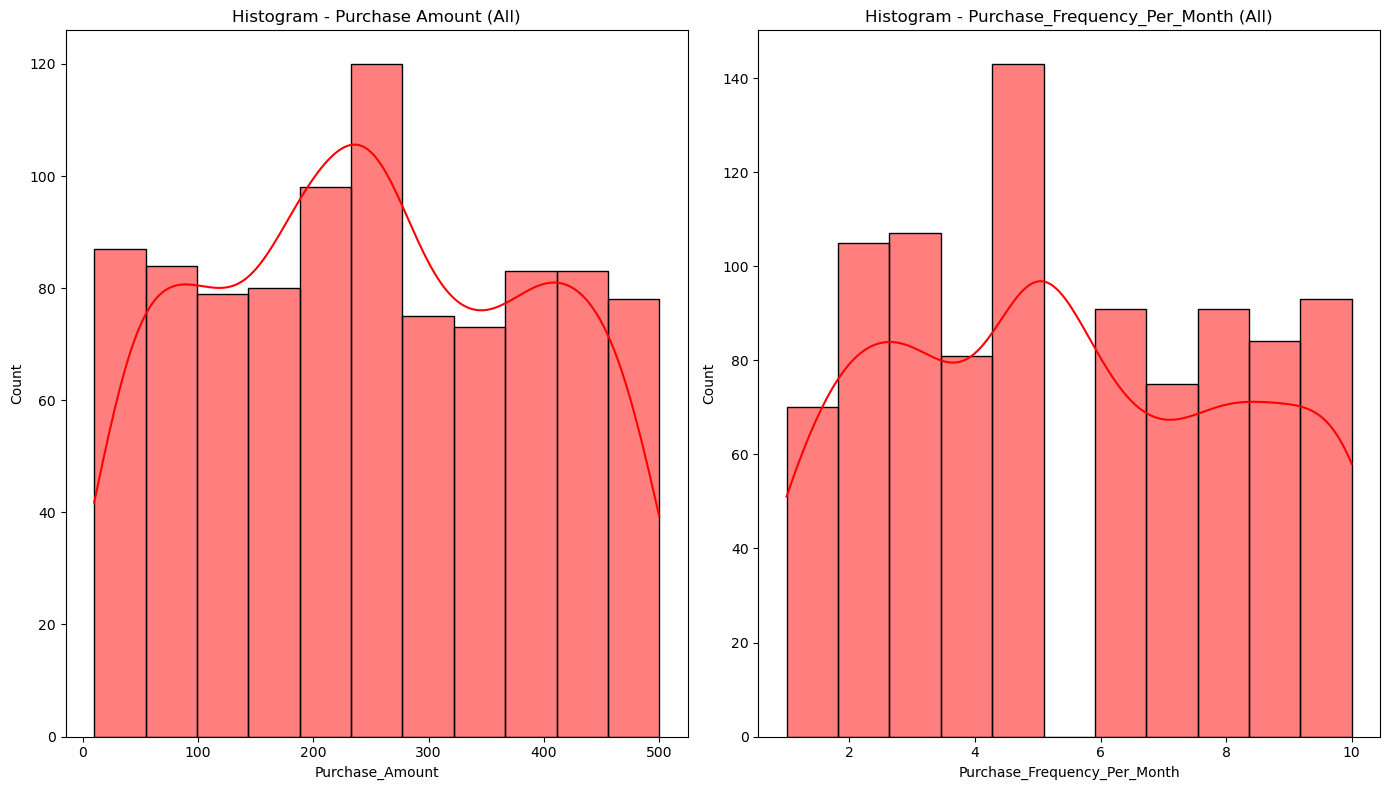

In [154]:
plt.figure(figsize=(14, 8))

# for purchase_amount
plt.subplot(1,2,1)
sns.histplot(IM_df['Purchase_Amount'], kde=True, color='red')
plt.title('Histogram - Purchase Amount (All)')

# for purchase_frequency_per_month
plt.subplot(1, 2, 2)
sns.histplot(IM_df['Purchase_Frequency_Per_Month'], kde=True, color='red')
plt.title('Histogram - Purchase_Frequency_Per_Month (All)')

plt.tight_layout()
plt.show()

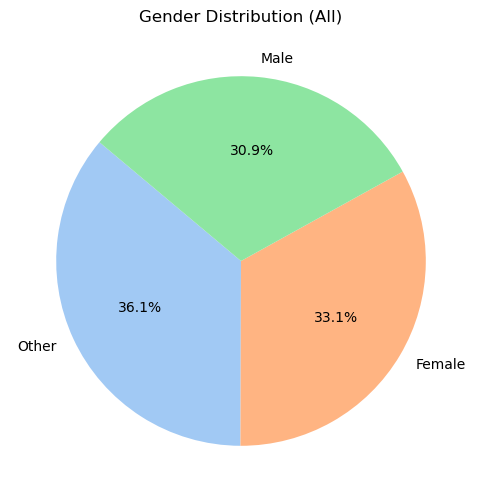

In [155]:
gender_counts = IM_df['Gender'].value_counts()
colors = sns.color_palette('pastel')
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Gender Distribution (All)')
plt.show()

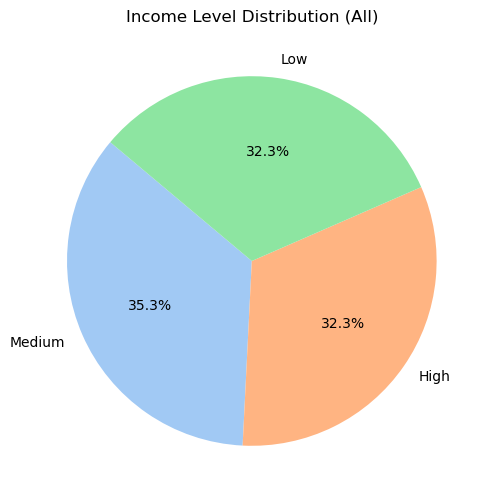

In [156]:
income_counts = IM_df['Income_Level'].value_counts()
colors = sns.color_palette('pastel')
plt.figure(figsize=(6, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Income Level Distribution (All)')
plt.show()

#### Box-Plot for Purchase Amount, Purchase Frequency Per Month

c:\Users\Omar\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
c:\Users\Omar\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


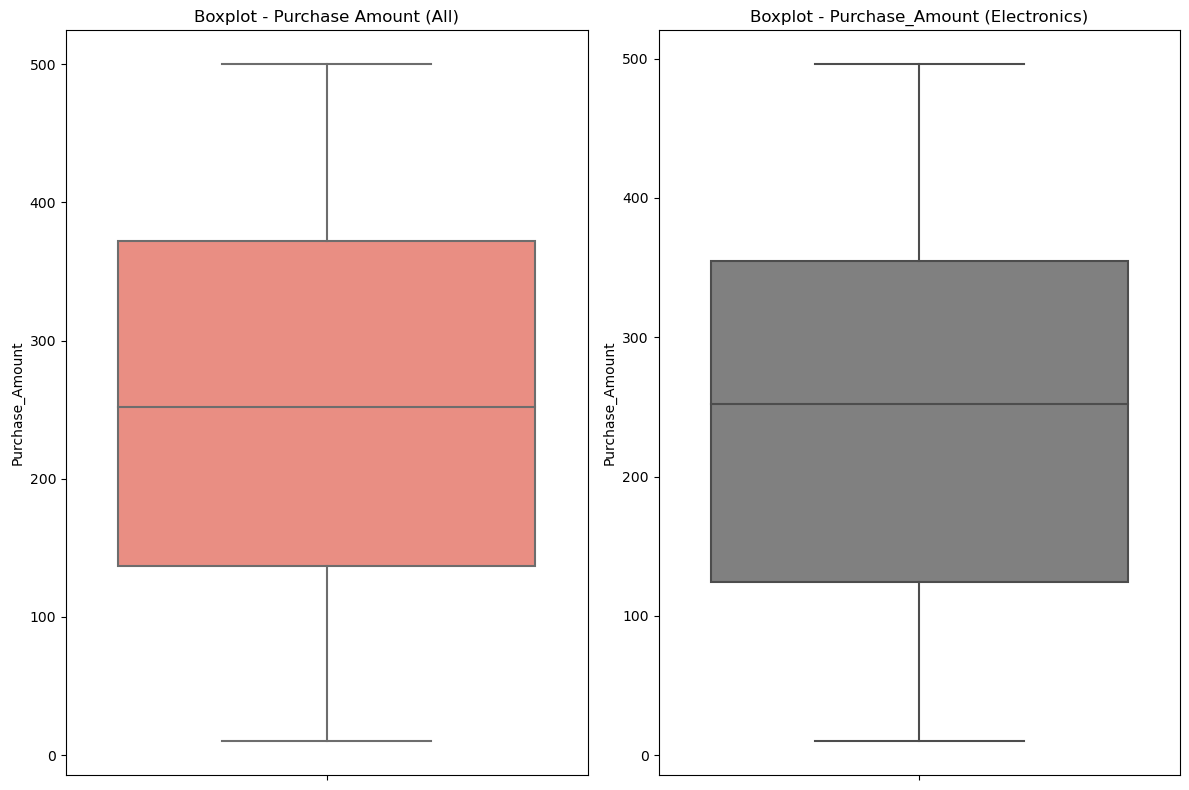

In [157]:
# Boxplots
plt.figure(figsize=(12, 8))

# Boxplot for Purchase Amount
plt.subplot(1, 2, 1)
sns.boxplot(y=IM_df['Purchase_Amount'], color='salmon', orient='h')
plt.title('Boxplot - Purchase Amount (All)')

# Boxplot for Purchase Frequency Per Month
plt.subplot(1, 2, 2)
sns.boxplot(y=EIM_df['Purchase_Amount'], color='grey', orient='h')
plt.title('Boxplot - Purchase_Amount (Electronics)')

plt.tight_layout()
plt.show()

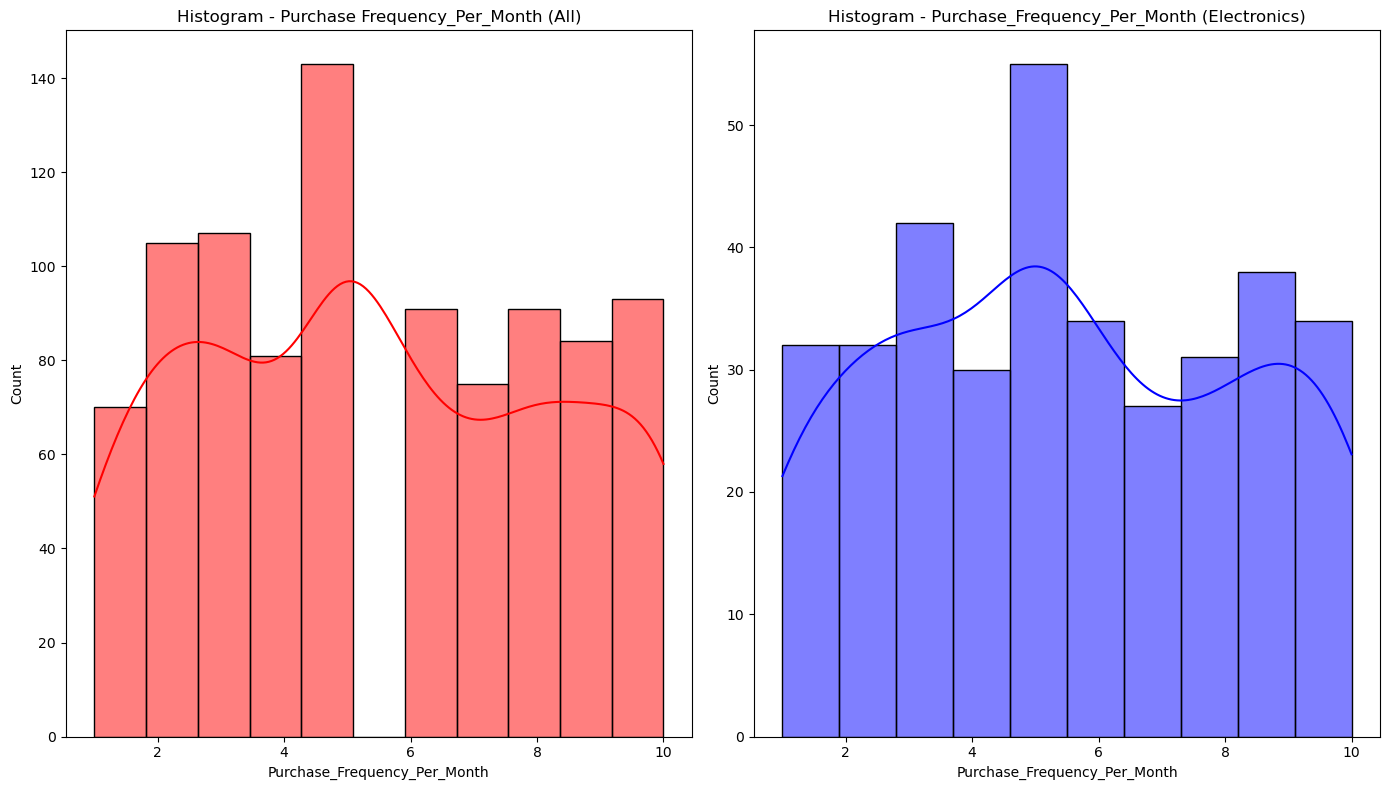

In [158]:
plt.figure(figsize=(14, 8))

# for purchase_amount
plt.subplot(1,2,1)
sns.histplot(IM_df['Purchase_Frequency_Per_Month'], kde=True, color='red')
plt.title('Histogram - Purchase Frequency_Per_Month (All)')

# for purchase_frequency_per_month
plt.subplot(1, 2, 2)
sns.histplot(EIM_df['Purchase_Frequency_Per_Month'], kde=True, color='blue')
plt.title('Histogram - Purchase_Frequency_Per_Month (Electronics)')

plt.tight_layout()
plt.show()

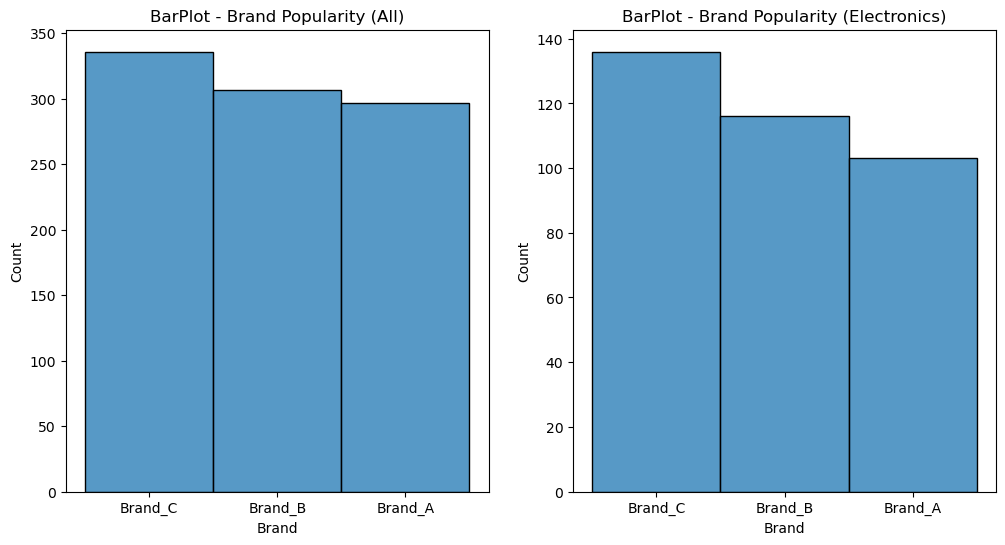

In [159]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.histplot(x='Brand', data=IM_df, palette='husk')
plt.title('BarPlot - Brand Popularity (All)')
plt.xlabel('Brand')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.histplot(x='Brand', data=EIM_df, palette='husk')
plt.title('BarPlot - Brand Popularity (Electronics)')
plt.xlabel('Brand')
plt.ylabel('Count')

plt.show()

#### Descriptive Statistics - Customer Age, Purchase Amount, Purchase_Frequency_Per_Month

In [160]:
descriptive_statistics = IM_df[['Age', 'Purchase_Amount', 'Purchase_Frequency_Per_Month']].describe()

descriptive_statistics

,Age,Purchase_Amount,Purchase_Frequency_Per_Month
count,940.000000,940.000000,940.000000
mean,49.639362,251.537234,5.452128
std,18.054548,137.804378,2.780743
min,18.000000,10.000000,1.000000
25%,35.000000,136.750000,3.000000
50%,50.000000,252.000000,5.000000
75%,65.250000,372.000000,8.000000
max,80.000000,500.000000,10.000000


In [161]:
descriptive_statistics = EIM_df[['Age', 'Purchase_Amount', 'Purchase_Frequency_Per_Month']].describe()

descriptive_statistics

,Age,Purchase_Amount,Purchase_Frequency_Per_Month
count,355.000000,355.000000,355.000000
mean,49.870423,243.171831,5.464789
std,18.109993,136.427735,2.812558
min,18.000000,10.000000,1.000000
25%,35.000000,124.500000,3.000000
50%,50.000000,252.000000,5.000000
75%,66.000000,354.500000,8.000000
max,80.000000,496.000000,10.000000


In [162]:
skewness = IM_df[['Age', 'Purchase_Amount', 'Purchase_Frequency_Per_Month']].skew()

skewness

Age                            -0.051107
Purchase_Amount                 0.047859
Purchase_Frequency_Per_Month    0.097363
dtype: float64

### Bivariate Analysis
### Scatter Plots, and Heatmaps and Bar Plots

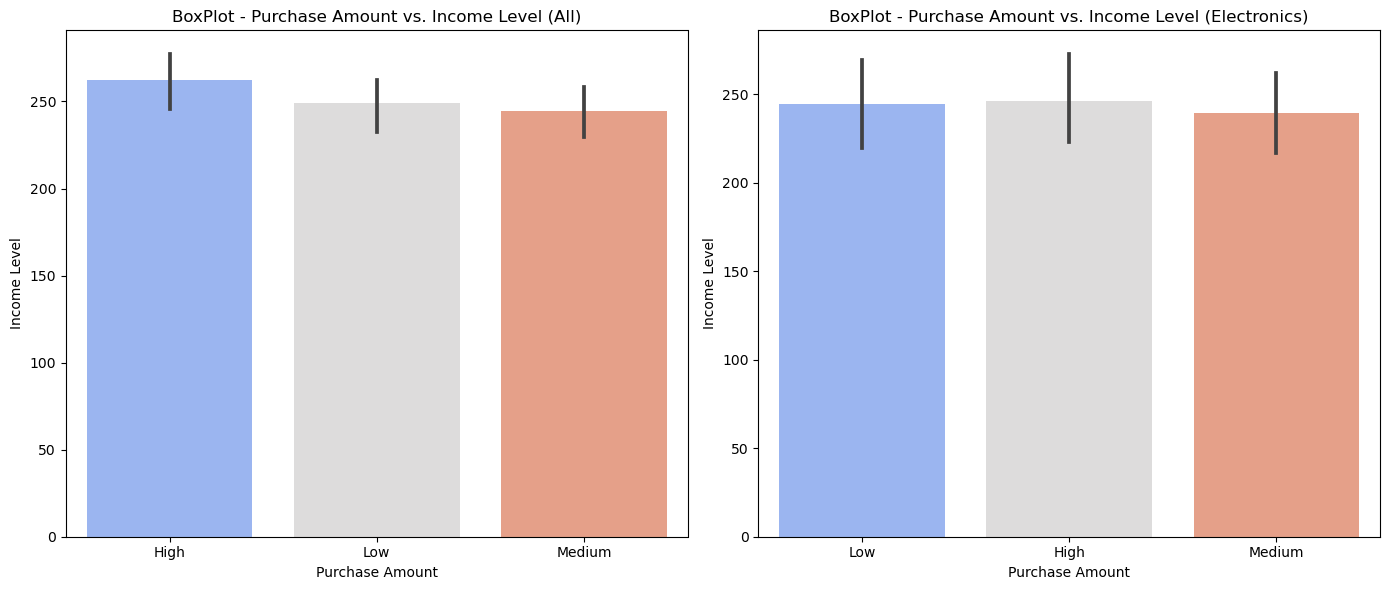

In [163]:
# BarPlot: Purchase Amount vs. Income Level
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)
sns.barplot(x='Income_Level', y='Purchase_Amount', data=IM_df, palette='coolwarm')
plt.title('BoxPlot - Purchase Amount vs. Income Level (All)')
plt.xlabel('Purchase Amount')
plt.ylabel('Income Level')

plt.subplot(1,2,2)
sns.barplot(x='Income_Level', y='Purchase_Amount', data=EIM_df, palette='coolwarm')
plt.title('BoxPlot - Purchase Amount vs. Income Level (Electronics)')
plt.xlabel('Purchase Amount')
plt.ylabel('Income Level')

plt.tight_layout()
plt.show()

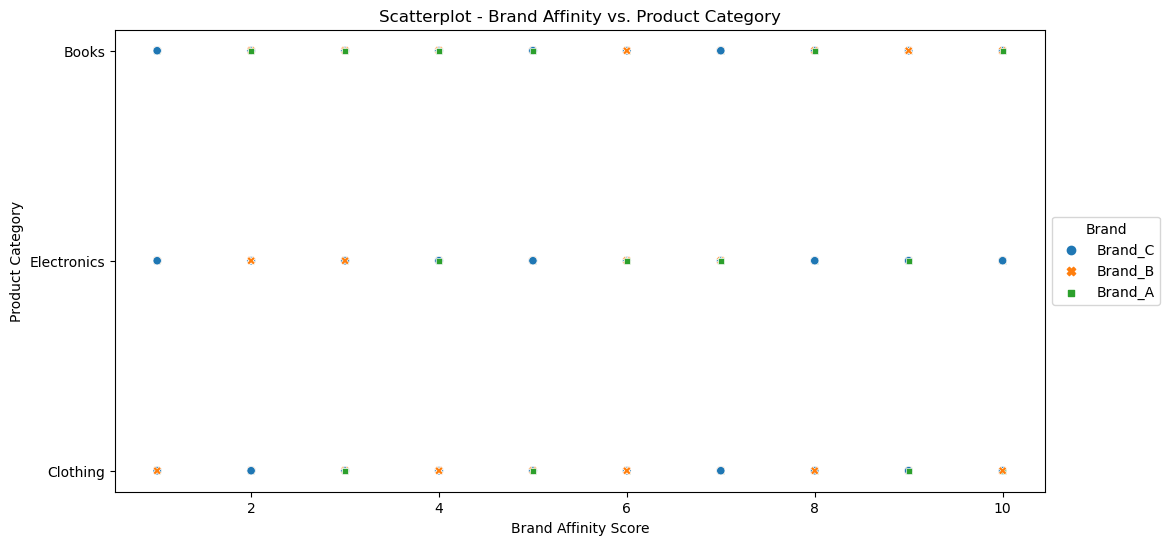

In [164]:
# Scatterplot: Brand Affinity vs. Product Category
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Brand_Affinity_Score', y='Product_Category', data=IM_df, color='green', hue='Brand', style='Brand')
plt.title('Scatterplot - Brand Affinity vs. Product Category')
plt.xlabel('Brand Affinity Score')
plt.ylabel('Product Category')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Brand')
plt.show()


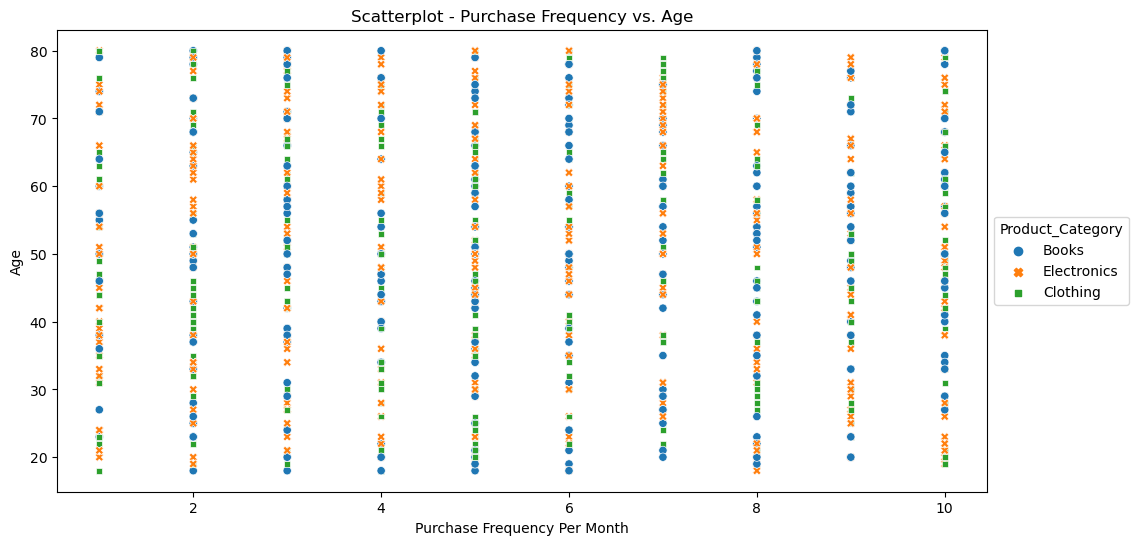

In [165]:
# Scatterplot: Purchase Frequency vs. Age
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Purchase_Frequency_Per_Month', y='Age', data=IM_df, color='orange', hue='Product_Category', style='Product_Category')
plt.title('Scatterplot - Purchase Frequency vs. Age')
plt.xlabel('Purchase Frequency Per Month')
plt.ylabel('Age')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Product_Category')
plt.show()

In [166]:
IM_df['Purchase_Frequency_Per_Month'].value_counts()

5.0     143
3.0     107
2.0     105
10.0     93
6.0      91
8.0      91
9.0      84
4.0      81
7.0      75
1.0      70
Name: Purchase_Frequency_Per_Month, dtype: int64

In [167]:
EIM_df['Product_Category_Preferences'].value_counts()

Medium    128
High      114
Low       113
Name: Product_Category_Preferences, dtype: int64

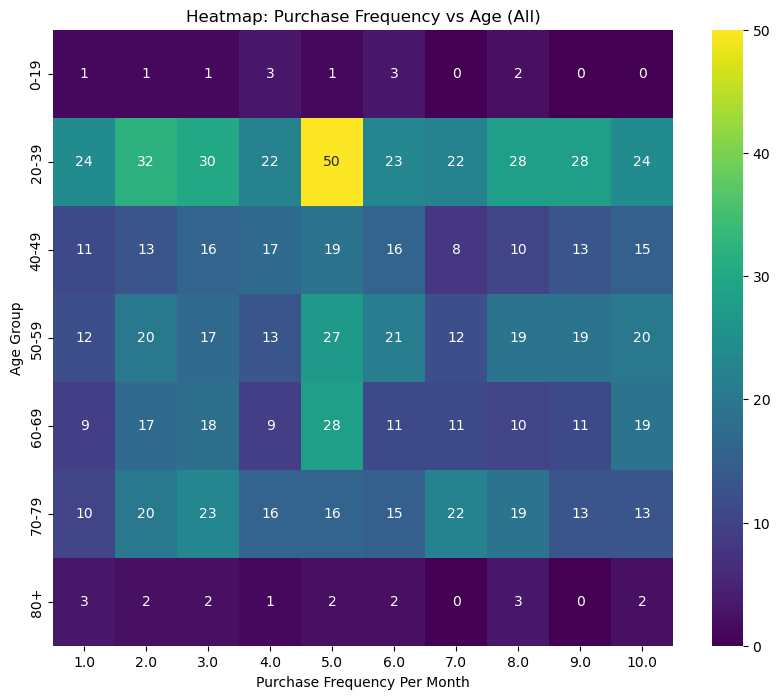

In [168]:
age_bins = [0, 19, 39, 49, 59, 69, 80, 99]
age_labels = ['0-19', '20-39', '40-49', '50-59', '60-69', '70-79', '80+']


IM_df['Age_Group'] = pd.cut(IM_df['Age'], bins=age_bins, labels=age_labels, right=False)


frequency_age_table = pd.crosstab(index=IM_df['Age_Group'], columns=IM_df['Purchase_Frequency_Per_Month'])

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(frequency_age_table, cmap='viridis', annot=True)
plt.title('Heatmap: Purchase Frequency vs Age (All)')
plt.xlabel('Purchase Frequency Per Month')
plt.ylabel('Age Group')
plt.show()

C:\Users\Omar\AppData\Local\Temp\ipykernel_18112\3721086282.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EIM_df['Age_Group'] = pd.cut(EIM_df['Age'], bins=age_bins, labels=age_labels, right=False)


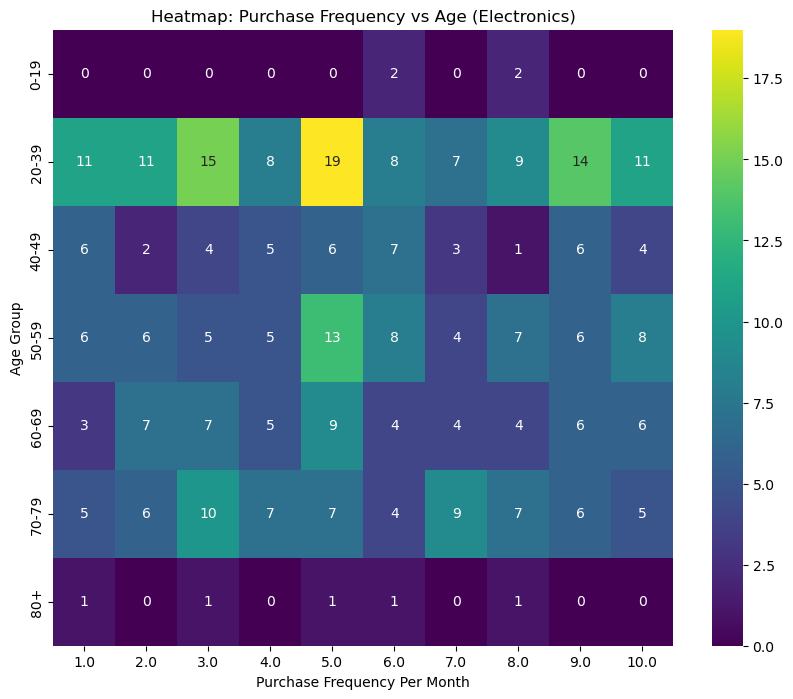

In [169]:
age_bins = [0, 19, 39, 49, 59, 69, 80, 99]
age_labels = ['0-19', '20-39', '40-49', '50-59', '60-69', '70-79', '80+']


EIM_df['Age_Group'] = pd.cut(EIM_df['Age'], bins=age_bins, labels=age_labels, right=False)


frequency_age_table = pd.crosstab(index=EIM_df['Age_Group'], columns=EIM_df['Purchase_Frequency_Per_Month'])

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(frequency_age_table, cmap='viridis', annot=True)
plt.title('Heatmap: Purchase Frequency vs Age (Electronics)')
plt.xlabel('Purchase Frequency Per Month')
plt.ylabel('Age Group')
plt.show()

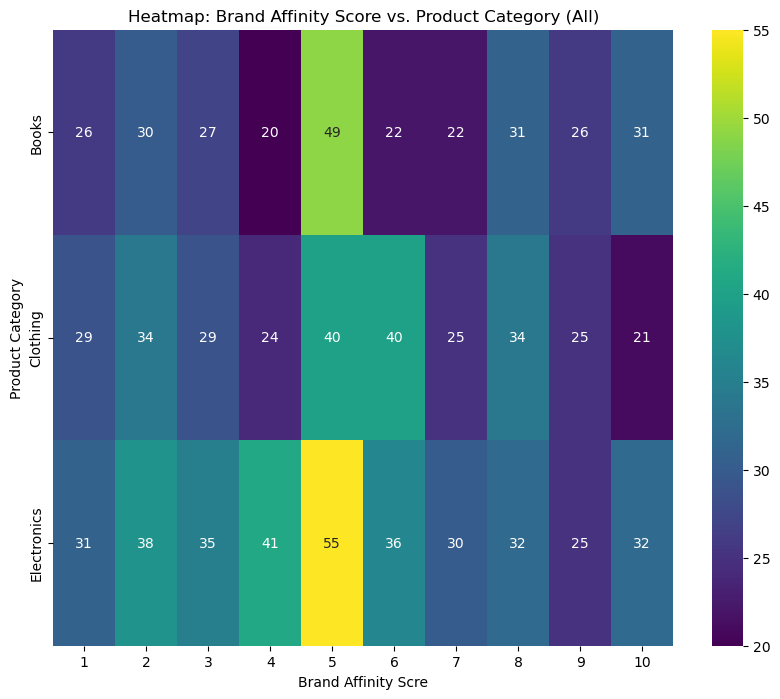

In [170]:
# here the inside box values represent the number from the side color changing bar, y-axis are the Product_Category and x-axis are the Brand_Afinity_Score
frequency_age_table = pd.crosstab(index=IM_df['Product_Category'], columns=IM_df['Brand_Affinity_Score'])
plt.figure(figsize=(10, 8))
sns.heatmap(frequency_age_table, cmap='viridis', annot=True)
plt.title('Heatmap: Brand Affinity Score vs. Product Category (All)')
plt.xlabel('Brand Affinity Scre')
plt.ylabel('Product Category')
plt.show()

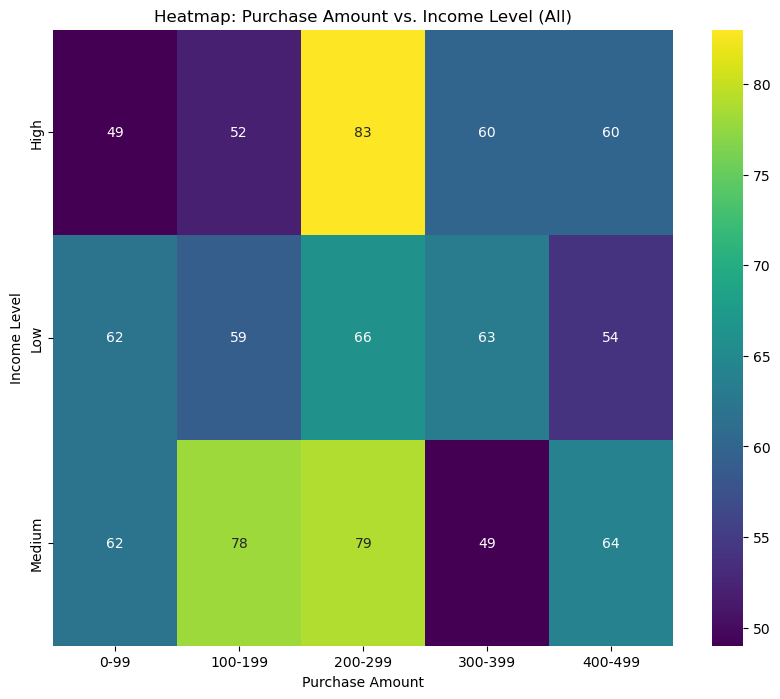

In [171]:
# IM_df['Income_Level'] = IM_df['Income_Level'].astype(str)

purchase_bins = [0, 100, 200, 300, 400, 500, float('inf')]  
purchase_labels = ['0-99', '100-199', '200-299', '300-399', '400-499', '500+']


IM_df['Purchase_Amount_Binned'] = pd.cut(IM_df['Purchase_Amount'], bins=purchase_bins, labels=purchase_labels)


frequency_table = pd.crosstab(index=IM_df['Income_Level'], columns=IM_df['Purchase_Amount_Binned'])

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(frequency_table, cmap='viridis', annot=True)
plt.title('Heatmap: Purchase Amount vs. Income Level (All)')
plt.xlabel('Purchase Amount')
plt.ylabel('Income Level')
plt.show()

C:\Users\Omar\AppData\Local\Temp\ipykernel_18112\4101797633.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EIM_df['Purchase_Amount_Binned'] = pd.cut(EIM_df['Purchase_Amount'], bins=purchase_bins, labels=purchase_labels)


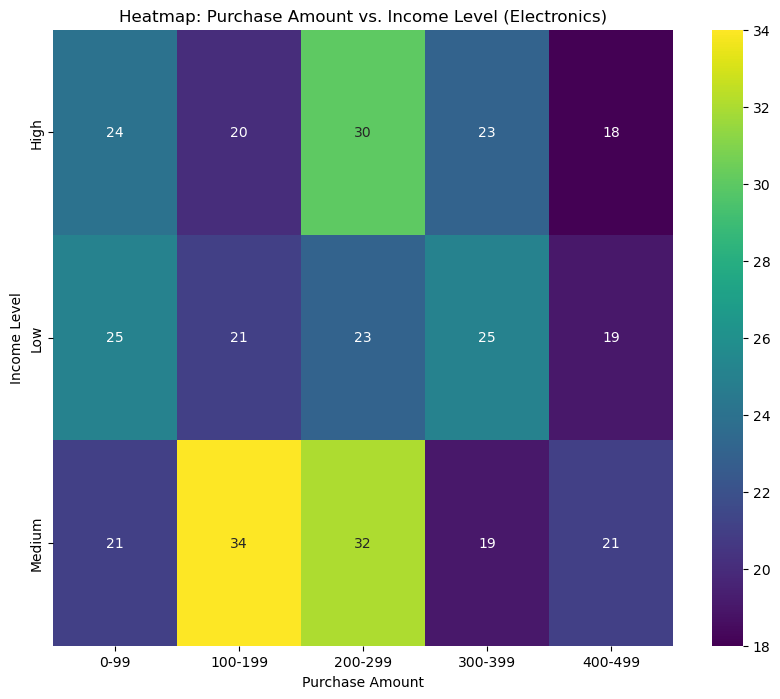

In [172]:
# IM_df['Income_Level'] = IM_df['Income_Level'].astype(str)


purchase_bins = [0, 100, 200, 300, 400, 500, float('inf')]  # Add float('inf') to include all larger values
purchase_labels = ['0-99', '100-199', '200-299', '300-399', '400-499', '500+']


EIM_df['Purchase_Amount_Binned'] = pd.cut(EIM_df['Purchase_Amount'], bins=purchase_bins, labels=purchase_labels)


frequency_table = pd.crosstab(index=EIM_df['Income_Level'], columns=EIM_df['Purchase_Amount_Binned'])

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(frequency_table, cmap='viridis', annot=True)
plt.title('Heatmap: Purchase Amount vs. Income Level (Electronics)')
plt.xlabel('Purchase Amount')
plt.ylabel('Income Level')
plt.show()

In [173]:
correlation_matrix = IM_df[['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Month', 'Year']].corr()

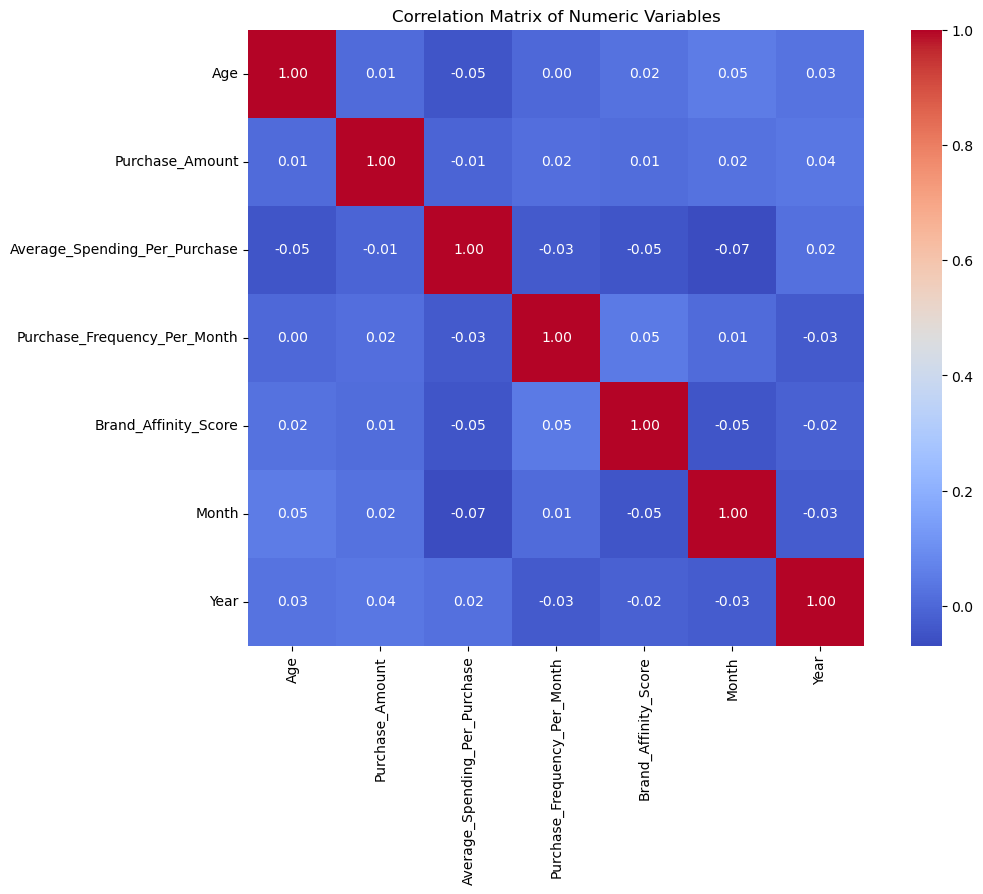

In [174]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [175]:
IM_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 899 to 984
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    940 non-null    object        
 1   Age                            940 non-null    float64       
 2   Gender                         940 non-null    object        
 3   Income_Level                   940 non-null    object        
 4   Address                        940 non-null    object        
 5   Transaction_ID                 940 non-null    object        
 6   Purchase_Date                  940 non-null    datetime64[ns]
 7   Product_ID                     940 non-null    object        
 8   Product_Category               940 non-null    object        
 9   Brand                          940 non-null    object        
 10  Purchase_Amount                940 non-null    float64       
 11  Average_Spending_

In [176]:
IM_df['Year_PD'] = IM_df['Purchase_Date'].dt.year
IM_df['Month_PM'] = IM_df['Purchase_Date'].dt.month

In [177]:
# Group data by Year and Month and count the number of purchases
purchase_frequency = IM_df.groupby(['Year', 'Month']).size().reset_index(name='Purchase_Frequency')
purchase_frequency

,Year,Month,Purchase_Frequency
0,1970,1,1
1,1970,2,2
2,1970,3,5
3,1970,4,1
4,1970,5,1
...,...,...,...
495,2023,6,2
496,2023,9,2
497,2023,10,1
498,2023,11,3


In [178]:
# Group data by Year and Month and calculate the average spending per purchase
average_spending = IM_df.groupby(['Year', 'Month'])['Average_Spending_Per_Purchase'].mean().reset_index()
average_spending

,Year,Month,Average_Spending_Per_Purchase
0,1970,1,16.0
1,1970,2,76.5
2,1970,3,68.6
3,1970,4,35.0
4,1970,5,88.0
...,...,...,...
495,2023,6,42.5
496,2023,9,75.5
497,2023,10,78.0
498,2023,11,58.0


In [179]:
# Group data by Year and Month and find the most purchased category
product_preferences = IM_df.groupby(['Year', 'Month'])['Product_Category'].agg(lambda x: x.value_counts().index[0]).reset_index(name='Most_Popular_Category')
product_preferences

,Year,Month,Most_Popular_Category
0,1970,1,Books
1,1970,2,Clothing
2,1970,3,Clothing
3,1970,4,Electronics
4,1970,5,Electronics
...,...,...,...
495,2023,6,Clothing
496,2023,9,Clothing
497,2023,10,Books
498,2023,11,Books


In [180]:
monthly_stats = IM_df.groupby(['Year_PD', 'Month_PM']).agg(
    Purchase_Count=('Purchase_Amount', 'count'),
    Average_Spending=('Average_Spending_Per_Purchase', 'mean'),
    Most_Purchased_Category=('Product_Category', lambda x: x.value_counts().index[0])
).reset_index()
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
monthly_stats['Month_Name'] = monthly_stats['Month_PM'].map(month_names)

In [181]:
monthly_stats

,Year_PD,Month_PM,Purchase_Count,Average_Spending,Most_Purchased_Category,Month_Name
0,2020,1,22,51.136364,Electronics,Jan
1,2020,2,17,55.823529,Electronics,Feb
2,2020,3,18,44.500000,Clothing,Mar
3,2020,4,22,55.681818,Electronics,Apr
4,2020,5,18,48.722222,Electronics,May
5,2020,6,15,71.000000,Books,Jun
6,2020,7,20,47.300000,Clothing,Jul
7,2020,8,11,55.454545,Electronics,Aug
8,2020,9,17,61.823529,Electronics,Sep
9,2020,10,21,68.333333,Electronics,Oct


In [182]:
month_to_season = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall',  12: 'Winter'
}
monthly_stats['Season'] = monthly_stats['Month_PM'].map(month_to_season)

In [183]:
monthly_stats

,Year_PD,Month_PM,Purchase_Count,Average_Spending,Most_Purchased_Category,Month_Name,Season
0,2020,1,22,51.136364,Electronics,Jan,Winter
1,2020,2,17,55.823529,Electronics,Feb,Winter
2,2020,3,18,44.500000,Clothing,Mar,Spring
3,2020,4,22,55.681818,Electronics,Apr,Spring
4,2020,5,18,48.722222,Electronics,May,Spring
5,2020,6,15,71.000000,Books,Jun,Summer
6,2020,7,20,47.300000,Clothing,Jul,Summer
7,2020,8,11,55.454545,Electronics,Aug,Summer
8,2020,9,17,61.823529,Electronics,Sep,Fall
9,2020,10,21,68.333333,Electronics,Oct,Fall


In [184]:
monthly_stats.groupby(['Year_PD', 'Season'])['Purchase_Count'].sum()

Year_PD  Season
2020     Fall      59
         Spring    58
         Summer    46
         Winter    67
2021     Fall      50
         Spring    51
         Summer    58
         Winter    50
2022     Fall      62
         Spring    43
         Summer    71
         Winter    72
2023     Fall      59
         Spring    58
         Summer    60
         Winter    76
Name: Purchase_Count, dtype: int64

In [185]:
monthly_stats_update = monthly_stats.groupby(['Year_PD', 'Season']).agg(
    Purchase_Count=('Purchase_Count', 'sum'),
    Average_Spending=('Average_Spending', 'mean')
).reset_index()

In [186]:
monthly_stats_update

,Year_PD,Season,Purchase_Count,Average_Spending
0,2020,Fall,59,58.258637
1,2020,Spring,58,49.634680
2,2020,Summer,46,57.918182
3,2020,Winter,67,51.486631
4,2021,Fall,50,48.005098
5,2021,Spring,51,49.841270
6,2021,Summer,58,50.504808
7,2021,Winter,50,54.949517
8,2022,Fall,62,55.676136
9,2022,Spring,43,55.404040


In [187]:
monthly_stats_update_1 = monthly_stats_update.groupby(['Season']).agg(
    Purchase_Count=('Purchase_Count', 'sum'),
    Average_Spending=('Average_Spending', 'sum')
).reset_index()

In [188]:
monthly_stats_update_1

,Season,Purchase_Count,Average_Spending
0,Fall,230,212.371523
1,Spring,210,200.998760
2,Summer,235,209.733199
3,Winter,265,206.807154


In [189]:
monthly_stats.groupby(['Year_PD', 'Season'])['Average_Spending'].sum()

Year_PD  Season
2020     Fall      174.775910
         Spring    148.904040
         Summer    173.754545
         Winter    154.459893
2021     Fall      144.015295
         Spring    149.523810
         Summer    151.514423
         Winter    164.848551
2022     Fall      167.028409
         Spring    166.212121
         Summer    150.845833
         Winter    155.568646
2023     Fall      151.294956
         Spring    138.356307
         Summer    153.084795
         Winter    145.544372
Name: Average_Spending, dtype: float64

In [190]:
IM_df['Purchase_Date'].value_counts()

2023-12-01    44
2023-11-19     4
2023-06-03     4
2022-06-24     4
2021-07-30     4
              ..
2021-06-21     1
2021-06-23     1
2021-06-26     1
2021-06-27     1
2021-12-19     1
Name: Purchase_Date, Length: 671, dtype: int64

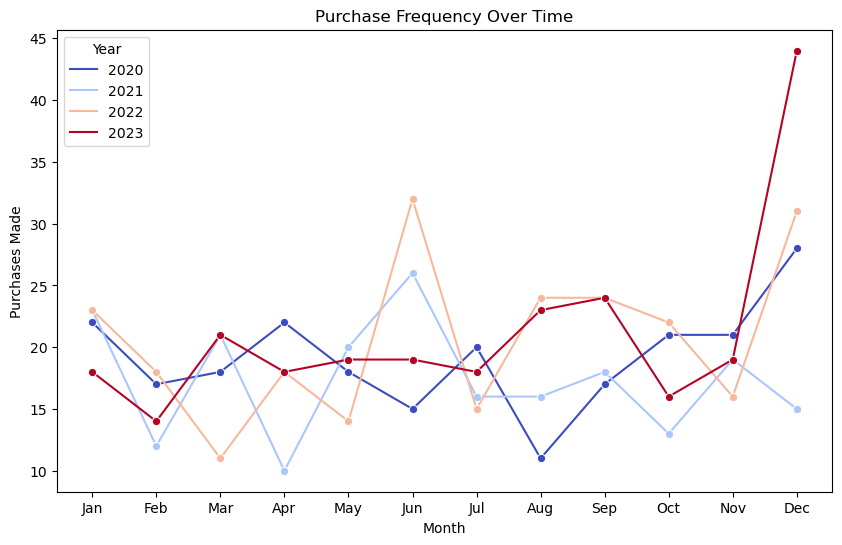

In [191]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_stats, x='Month_Name', y='Purchase_Count', hue='Year_PD', palette="coolwarm", marker='o')
plt.title('Purchase Frequency Over Time')
plt.xlabel('Month')
plt.ylabel('Purchases Made')
plt.legend(title='Year')
plt.show()

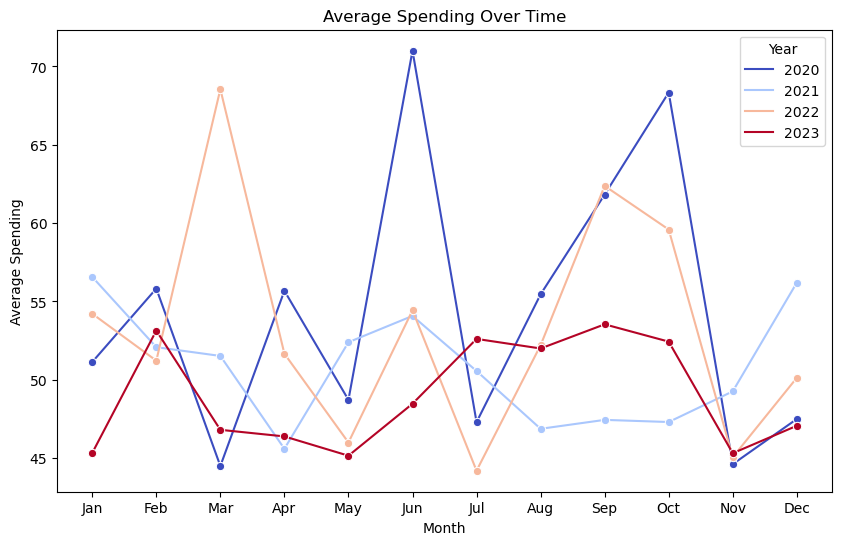

In [192]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_stats, x='Month_Name', y='Average_Spending', hue='Year_PD', palette="coolwarm", marker='o')
plt.title('Average Spending Over Time')
plt.xlabel('Month')
plt.ylabel('Average Spending')
plt.legend(title='Year')
plt.show()

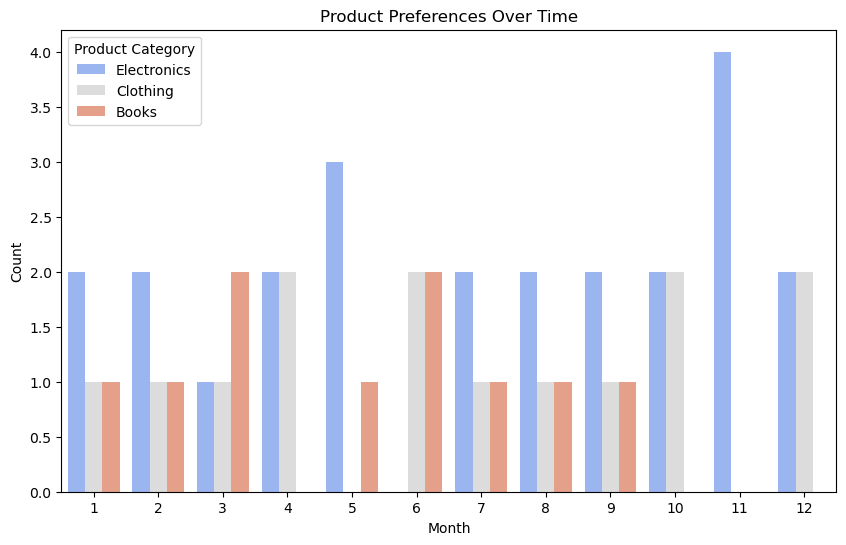

In [193]:
plt.figure(figsize=(10, 6))
sns.countplot(data=monthly_stats, x='Month_PM', hue='Most_Purchased_Category', palette="coolwarm")
plt.title('Product Preferences Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Product Category')
plt.show()

In [194]:
monthly_stats

,Year_PD,Month_PM,Purchase_Count,Average_Spending,Most_Purchased_Category,Month_Name,Season
0,2020,1,22,51.136364,Electronics,Jan,Winter
1,2020,2,17,55.823529,Electronics,Feb,Winter
2,2020,3,18,44.500000,Clothing,Mar,Spring
3,2020,4,22,55.681818,Electronics,Apr,Spring
4,2020,5,18,48.722222,Electronics,May,Spring
5,2020,6,15,71.000000,Books,Jun,Summer
6,2020,7,20,47.300000,Clothing,Jul,Summer
7,2020,8,11,55.454545,Electronics,Aug,Summer
8,2020,9,17,61.823529,Electronics,Sep,Fall
9,2020,10,21,68.333333,Electronics,Oct,Fall


In [195]:
monthly_stats.groupby('Season')['Purchase_Count'].count()

Season
Fall      12
Spring    12
Summer    12
Winter    12
Name: Purchase_Count, dtype: int64

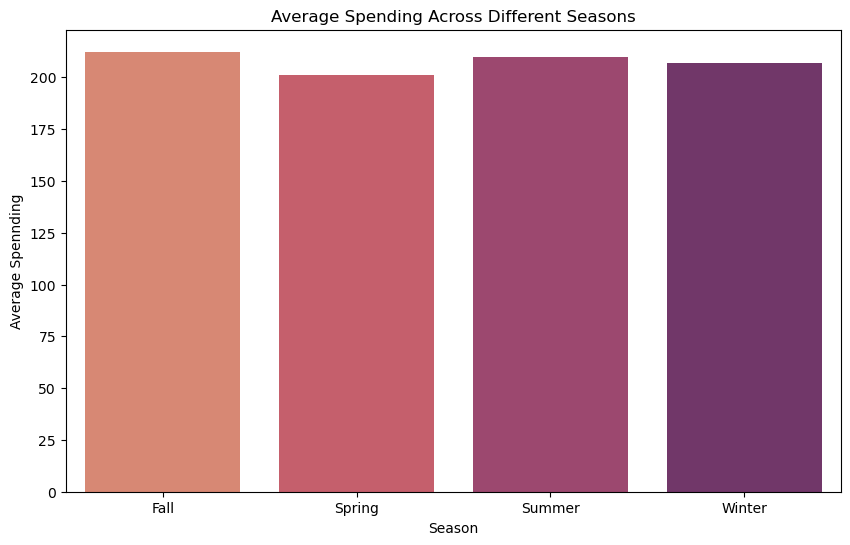

In [196]:
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_stats_update_1, x='Season', y='Average_Spending', palette='flare')
plt.title('Average Spending Across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Average Spennding')
plt.show()

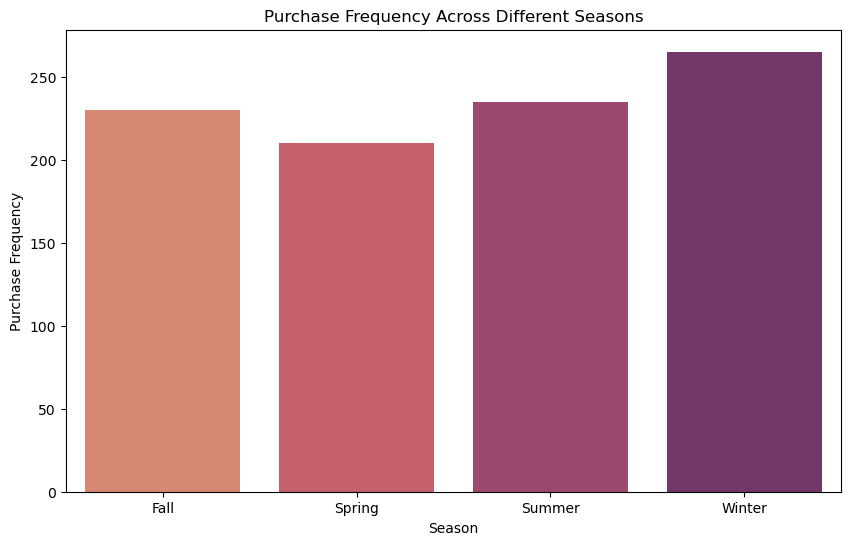

In [197]:
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_stats_update_1, x='Season', y='Purchase_Count', palette='flare')
plt.title('Purchase Frequency Across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Purchase Frequency')
plt.show()

## Module 4


In [198]:
IM_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 899 to 984
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    940 non-null    object        
 1   Age                            940 non-null    float64       
 2   Gender                         940 non-null    object        
 3   Income_Level                   940 non-null    object        
 4   Address                        940 non-null    object        
 5   Transaction_ID                 940 non-null    object        
 6   Purchase_Date                  940 non-null    datetime64[ns]
 7   Product_ID                     940 non-null    object        
 8   Product_Category               940 non-null    object        
 9   Brand                          940 non-null    object        
 10  Purchase_Amount                940 non-null    float64       
 11  Average_Spending_

### Label Encoding

In [209]:
one_hot_encoding = ['Gender', 'Product_Category', 'Brand', 'Product_Category_Preferences']
IM_df_encoded = pd.get_dummies(IM_K_DF, columns=one_hot_encoding)

income_level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
IM_df_encoded['Income_Level'] = IM_K_DF['Income_Level'].map(income_level_mapping)

In [210]:
IM_df_encoded['Extract_Date'] = IM_df_encoded['Purchase_Date'].dt.date
IM_df_encoded['Extract_Date'] = IM_df_encoded['Extract_Date'].astype(str).str[-2:].astype(int)
IM_df_encoded['Extract_Month'] = IM_df_encoded['Purchase_Date'].dt.month
IM_df_encoded['Extract_Year'] = IM_df_encoded['Purchase_Date'].dt.year

IM_df_encoded

,Customer_ID,Age,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,...,Product_Category_Electronics,Brand_Brand_A,Brand_Brand_B,Brand_Brand_C,Product_Category_Preferences_High,Product_Category_Preferences_Low,Product_Category_Preferences_Medium,Extract_Date,Extract_Month,Extract_Year
899,a73774fe-d420-46ca-8a43-44eb51438f5e,48.0,3,1412 Blake Parkway Apt. 316\nLake Rodneycheste...,c1cba058-2afd-41e4-826c-ea03c51afaad,2020-01-02,1c72a791-7b4d-4f7d-960e-7a611428a870,424.0,43.0,6.0,...,0,0,0,1,0,0,1,2,1,2020
788,8f25e25c-75c7-4eb7-b2e2-f708dee8ef13,39.0,1,414 Lauren Mountain Suite 243\nSouth Jessicabe...,638cded1-9504-4fc9-a1e1-09ee49388c8e,2020-01-03,495c76ec-35f1-4b80-86b5-b91558ffb2a5,428.0,92.0,1.0,...,1,0,0,1,0,1,0,3,1,2020
414,228febfa-bfb5-413a-ab8a-1eeb905b36fd,40.0,1,"50568 Joseph Prairie\nPort Kimberlyview, ND 33279",96375f25-2e13-4e66-8e76-bbbf06760439,2020-01-04,aab09f53-a4a1-400e-932f-62120350545b,407.0,50.0,9.0,...,1,0,1,0,1,0,0,4,1,2020
160,09427631-943f-4427-80e6-79c9da0c2613,71.0,3,"4363 Leslie Hills\nLake Mary, FL 20948",be33a103-bf30-4787-ad68-54a3efc8d675,2020-01-05,6cb25dba-2dd1-4724-84d0-322497ead674,381.0,42.0,5.0,...,0,0,1,0,0,1,0,5,1,2020
389,d8fbc8d7-7b8a-4903-85b7-630519ab33d7,40.0,1,"0114 Jacob Passage Suite 324\nAmandastad, NV 1...",fa0db7eb-2748-4e3d-95dc-8bf48c5dac5f,2020-01-07,878b2b79-6f19-4162-9164-953af3f6e903,451.0,53.0,9.0,...,0,0,0,1,0,1,0,7,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,8d053cfb-bd18-41aa-a5f2-f40eb2c8c09e,38.0,2,"394 Michael Rue Apt. 489\nNorth Jennyfurt, WV ...",bedac703-049a-443a-b072-8e71b313747e,2023-12-01,34c3eaca-2f61-4e56-976f-a388852f0b8a,54.0,78.0,3.0,...,0,1,0,0,0,1,0,1,12,2023
903,0c922c19-8b78-4b85-ae75-48a3c4dbd03e,37.0,3,"61520 Smith Station Apt. 282\nNew Alicia, NC 1...",80630c86-39c6-4e2c-a688-fe5214fbd3d0,2023-12-01,43a04190-bb8e-497c-a534-3e9bb50aa63f,270.0,12.0,3.0,...,1,0,1,0,0,0,1,1,12,2023
925,1005d9e3-2274-4efe-9d4b-5490ac5d8e43,44.0,3,USCGC Freeman\nFPO AE 95564,3d4f42bf-ef29-4bec-a181-7a76fba28f70,2023-12-01,e54a0eaf-35f5-42f6-887e-443e3062b113,65.0,12.0,5.0,...,1,0,0,1,0,0,1,1,12,2023
936,fd81fe51-48b3-4942-a9cd-0555a118973d,22.0,3,"43267 Jacob Port\nDominguezville, PW 61902",cdf6bc11-be19-4c19-a882-944c26624879,2023-12-01,cd5e259f-0d33-49e6-b92d-6553963dc1c9,258.0,15.0,6.0,...,0,0,1,0,0,1,0,1,12,2023


### Scaling

In [213]:
columns_to_drop = ['Age_Group', 'Purchase_Amount_Binned', 'Customer_ID', 'Address', 'Transaction_ID', 'Purchase_Date', 'Product_ID', 'Season', 'Purchase_Date']
IM_df_numeric = IM_df_encoded.drop(columns=columns_to_drop)

#IM_df_numeric.info()

scaler = MinMaxScaler()
IM_df_scaled = pd.DataFrame(scaler.fit_transform(IM_df_numeric), columns=IM_df_numeric.columns)

In [285]:
IM_df_scaled

,Age,Income_Level,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Year_PD,Month_PM,...,Product_Category_Electronics,Brand_Brand_A,Brand_Brand_B,Brand_Brand_C,Product_Category_Preferences_High,Product_Category_Preferences_Low,Product_Category_Preferences_Medium,Extract_Date,Extract_Month,Extract_Year
0,0.483871,1.0,0.844898,0.400000,0.555556,0.444444,0.363636,0.452830,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.033333,0.0,0.0
1,0.338710,0.0,0.853061,0.915789,0.000000,0.666667,0.000000,0.584906,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.066667,0.0,0.0
2,0.354839,0.0,0.810204,0.473684,0.888889,0.555556,1.000000,0.547170,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.100000,0.0,0.0
3,0.854839,1.0,0.757143,0.389474,0.444444,0.777778,0.727273,0.547170,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.133333,0.0,0.0
4,0.354839,0.0,0.900000,0.505263,0.888889,0.888889,0.363636,0.849057,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.200000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,0.322581,0.5,0.089796,0.768421,0.222222,0.333333,0.272727,0.415094,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.0,1.0
936,0.306452,1.0,0.530612,0.073684,0.222222,0.222222,0.272727,0.339623,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,1.0
937,0.419355,1.0,0.112245,0.073684,0.444444,1.000000,0.909091,0.320755,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,1.0,1.0
938,0.064516,1.0,0.506122,0.105263,0.555556,0.555556,1.000000,0.264151,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,1.0,1.0


### K-Means Clustering

#### Analyze the Elbow Plot

c:\Users\Omar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Omar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Omar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Omar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

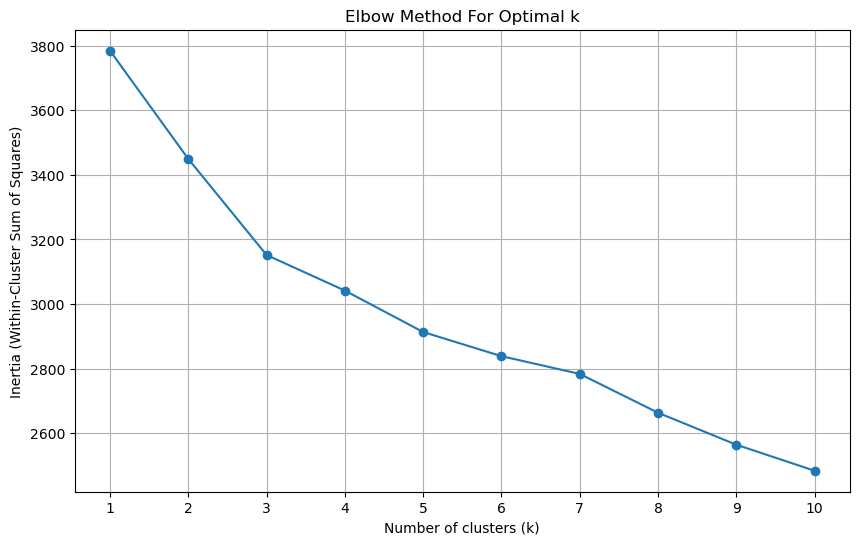

In [216]:
inertia = []
k_values = range(1, 11)  # testing a range of k values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(IM_df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

c:\Users\Omar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Omar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Omar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Omar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

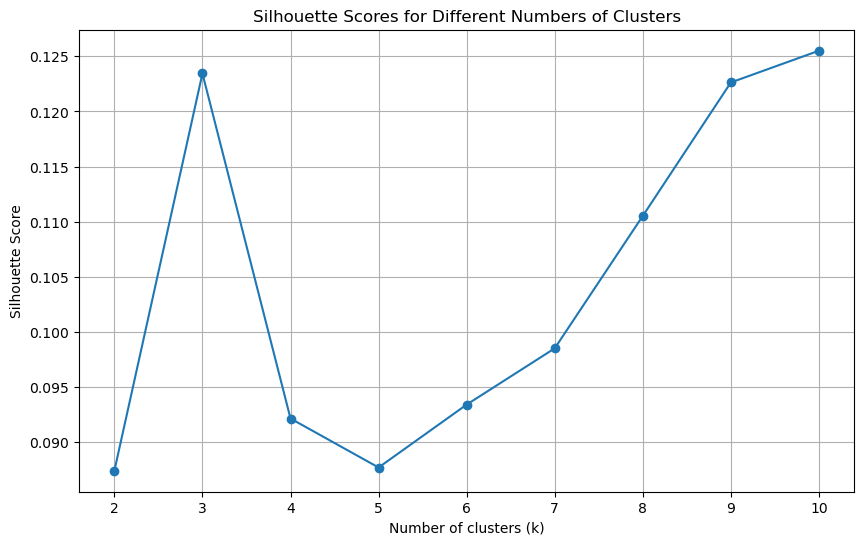

The optimal number of clusters based on silhouette score is: 10


In [218]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a scaled DataFrame named IM_df_scaled

# Define a range for k (from 2 to 10, because silhouette score is not defined for k=1)
k_range = range(2, 11)

# List to store silhouette scores for each k
silhouette_scores = []

# Calculate silhouette scores for different values of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(IM_df_scaled)
    silhouette_avg = silhouette_score(IM_df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Find the optimal k where silhouette score is the highest
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters based on silhouette score is: {optimal_k}")


### K-Means

c:\Users\Omar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


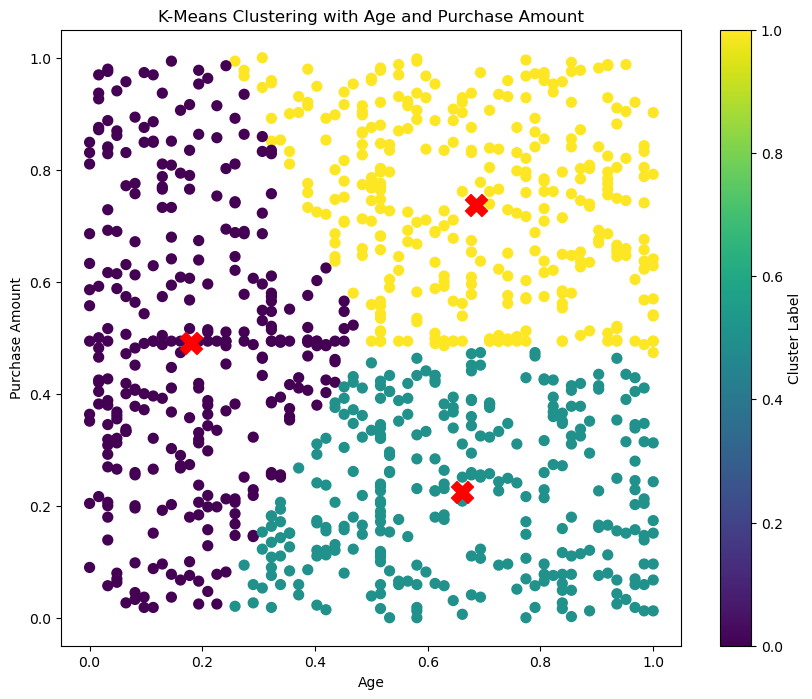

In [330]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'IM_df' is your DataFrame and it contains 'Age' and 'Purchase_Amount' columns
# Select the 'Age' and 'Purchase_Amount' columns for clustering
X = IM_df_scaled[['Age', 'Purchase_Amount']].values

# Apply K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=5)
clusters = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='X')

# Add titles and labels
plt.title('K-Means Clustering with Age and Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.colorbar(label='Cluster Label')
plt.show()


c:\Users\Omar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


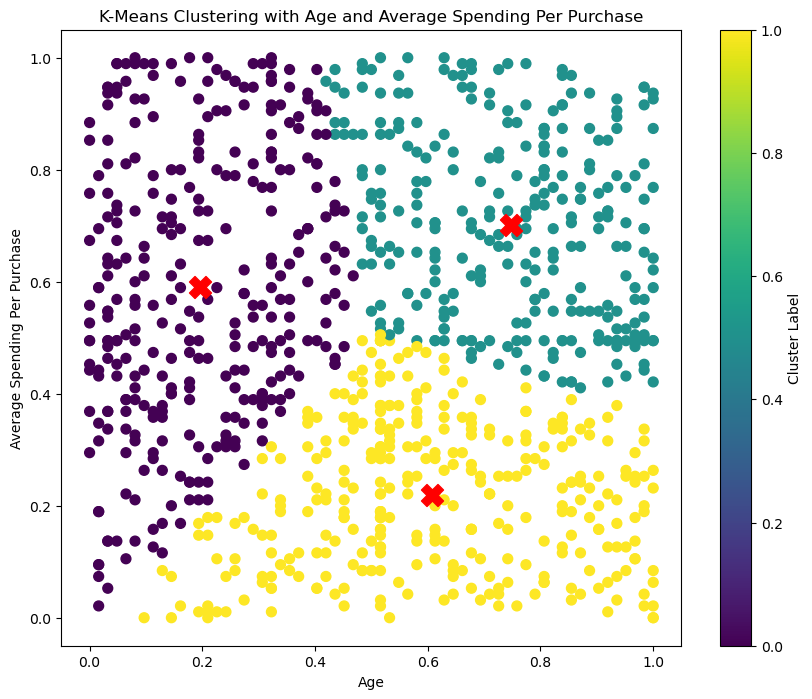

In [362]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = IM_df_scaled[['Age', 'Average_Spending_Per_Purchase']].values

# Apply K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=5)
clusters = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='X')

# Add titles and labels
plt.title('K-Means Clustering with Age and Average Spending Per Purchase')
plt.xlabel('Age')
plt.ylabel('Average Spending Per Purchase')
plt.colorbar(label='Cluster Label')
plt.show()


In [334]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=5)  
IM_df_scaled['Cluster'] = kmeans.fit_predict(IM_df_scaled[['Purchase_Amount', 'Brand_Affinity_Score', 'Purchase_Frequency_Per_Month']])  # Replace with your actual features

cluster_characteristics = IM_df_scaled.groupby('Cluster').mean()

for cluster_num in range(kmeans.n_clusters):
    print(f"Cluster {cluster_num} characteristics:")
    print(cluster_characteristics.loc[cluster_num])
    print()


c:\Users\Omar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Cluster 0 characteristics:
Age                                    0.516978
Income_Level                           0.462406
Purchase_Amount                        0.493555
Average_Spending_Per_Purchase          0.471349
Purchase_Frequency_Per_Month           0.311612
Brand_Affinity_Score                   0.791562
Month                                  0.487013
Year                                   0.489715
Year_PD                                0.506266
Month_PM                               0.531784
Gender_Female                          0.323308
Gender_Male                            0.300752
Gender_Other                           0.375940
Product_Category_Books                 0.293233
Product_Category_Clothing              0.357143
Product_Category_Electronics           0.349624
Brand_Brand_A                          0.353383
Brand_Brand_B                          0.300752
Brand_Brand_C                          0.345865
Product_Category_Preferences_High      0.285714
Product_Categ

In [364]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X = IM_df_scaled[['Age', 'Average_Spending_Per_Purchase']].values

data_no_noise = IM_df_scaled[IM_df_scaled['Cluster'] != -1]
X_no_noise = X[IM_df_scaled['Cluster'] != -1]

if len(data_no_noise['Cluster'].unique()) > 1:
    silhouette_avg = silhouette_score(X_no_noise, data_no_noise['Cluster'])
    calinski_harabasz = calinski_harabasz_score(X_no_noise, data_no_noise['Cluster'])
    davies_bouldin = davies_bouldin_score(X_no_noise, data_no_noise['Cluster'])
else:
    silhouette_avg = -1
    calinski_harabasz = -1
    davies_bouldin = -1

print(f"Silhouette Coefficient: {silhouette_avg:.2f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")


Silhouette Coefficient: -0.01
Calinski-Harabasz Score: 1.07
Davies-Bouldin Index: 41.62


#### DBScan


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


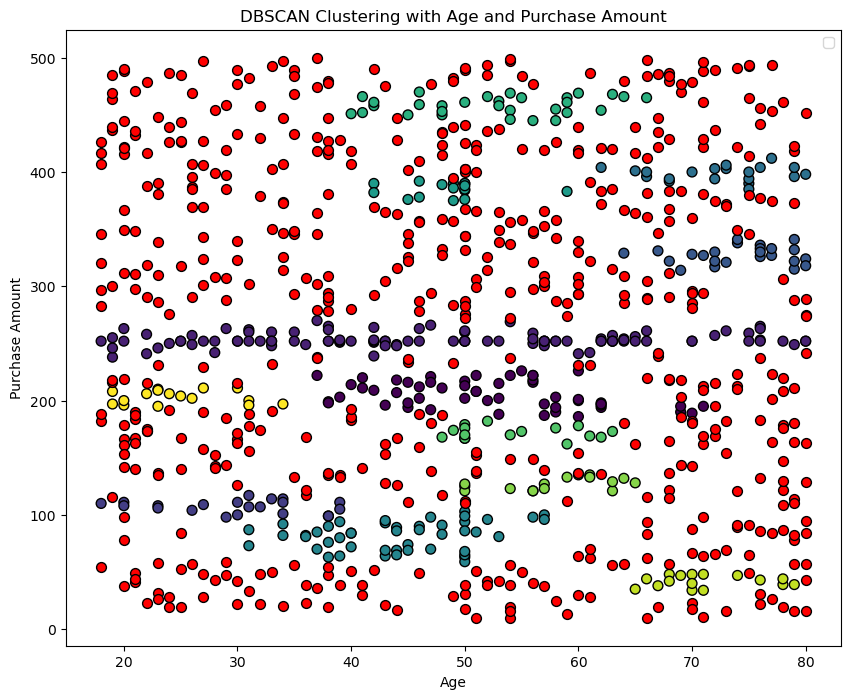

In [310]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X = IM_df[['Age', 'Purchase_Amount']].values

dbscan = DBSCAN(eps=10, min_samples=15)
clusters = dbscan.fit_predict(X)


plt.figure(figsize=(10, 8))
plt.scatter(X[clusters != -1, 0], X[clusters != -1, 1], c=clusters[clusters != -1], cmap='viridis', s=50, edgecolor='k')
plt.scatter(X[clusters == -1, 0], X[clusters == -1, 1], color='red', s=50, edgecolor='k')

plt.title('DBSCAN Clustering with Age and Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


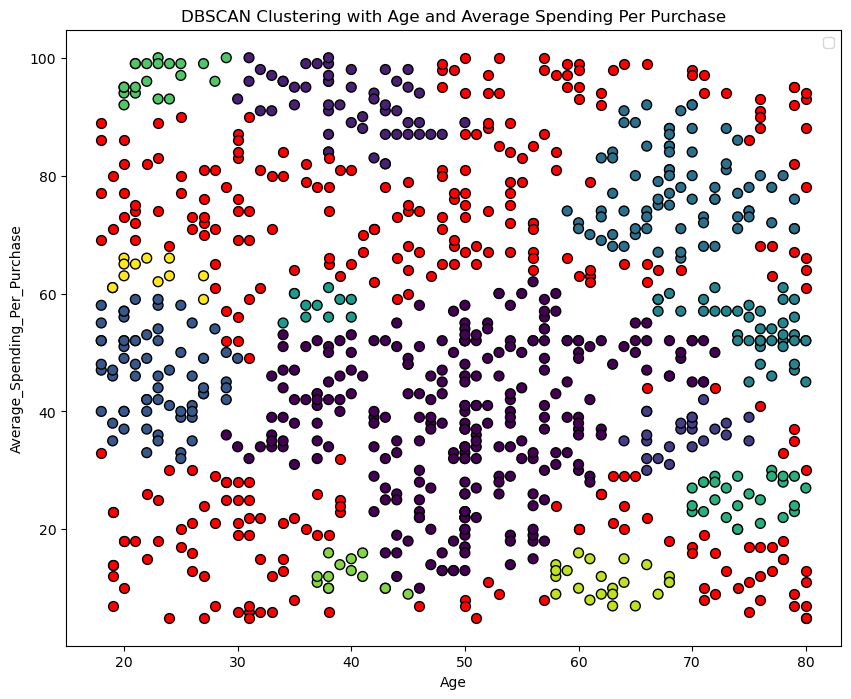

In [349]:
X = IM_df[['Age', 'Average_Spending_Per_Purchase']].values
dbscan = DBSCAN(eps=5, min_samples=16)
clusters = dbscan.fit_predict(X)


plt.figure(figsize=(10, 8))
plt.scatter(X[clusters != -1, 0], X[clusters != -1, 1], c=clusters[clusters != -1], cmap='viridis', s=50, edgecolor='k')
plt.scatter(X[clusters == -1, 0], X[clusters == -1, 1], color='red', s=50, edgecolor='k')

# Add titles and labels
plt.title('DBSCAN Clustering with Age and Average Spending Per Purchase')
plt.xlabel('Age')
plt.ylabel('Average_Spending_Per_Purchase')
plt.legend()
plt.show()


In [327]:


X = IM_df_scaled[['Age', 'Average_Spending_Per_Purchase']]

dbscan = DBSCAN(eps=5, min_samples=16)
IM_df_scaled['Cluster_DBSCAN'] = dbscan.fit_predict(X)


cluster_characteristics = IM_df_scaled[IM_df_scaled['Cluster_DBSCAN'] != -1].groupby('Cluster_DBSCAN').mean()

for cluster_num in sorted(cluster_characteristics.index):
    print(f"Cluster {cluster_num} characteristics:")
    print(cluster_characteristics.loc[cluster_num])
    print()


Cluster 0 characteristics:
Age                                    0.510312
Income_Level                           0.500000
Purchase_Amount                        0.492933
Average_Spending_Per_Purchase          0.492385
Purchase_Frequency_Per_Month           0.494681
Brand_Affinity_Score                   0.485816
Month                                  0.507544
Year                                   0.509956
Year_PD                                0.519149
Month_PM                               0.526402
Gender_Female                          0.330851
Gender_Male                            0.308511
Gender_Other                           0.360638
Product_Category_Books                 0.302128
Product_Category_Clothing              0.320213
Product_Category_Electronics           0.377660
Brand_Brand_A                          0.315957
Brand_Brand_B                          0.326596
Brand_Brand_C                          0.357447
Product_Category_Preferences_High      0.320213
Product_Categ

In [354]:
X_dbscan = IM_df_scaled[['Age', 'Purchase_Amount']].values

dbscan = DBSCAN(eps=0.1, min_samples=18)
IM_df_scaled['Cluster_DBSCAN'] = dbscan.fit_predict(X_dbscan)


data_no_noise = IM_df_scaled[IM_df_scaled['Cluster_DBSCAN'] != -1]
X_no_noise = X_dbscan[IM_df_scaled['Cluster_DBSCAN'] != -1]

if len(set(data_no_noise['Cluster_DBSCAN'])) > 1:
    silhouette_avg = silhouette_score(X_no_noise, data_no_noise['Cluster_DBSCAN'])
    calinski_harabasz = calinski_harabasz_score(X_no_noise, data_no_noise['Cluster_DBSCAN'])
    davies_bouldin = davies_bouldin_score(X_no_noise, data_no_noise['Cluster_DBSCAN'])
else:
    silhouette_avg = -1
    calinski_harabasz = -1
    davies_bouldin = -1

print(f"Silhouette Coefficient: {silhouette_avg:.2f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")


Silhouette Coefficient: -1.00
Calinski-Harabasz Score: -1.00
Davies-Bouldin Index: -1.00


#### K-Means++

c:\Users\Omar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Omar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


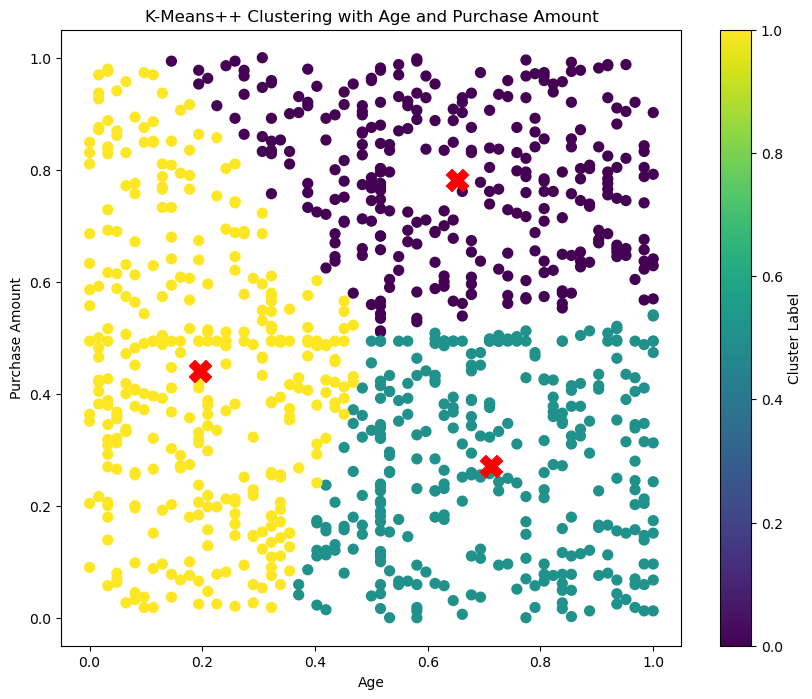

In [337]:
X = IM_df_scaled[['Age', 'Purchase_Amount']].values

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='X')

plt.title('K-Means++ Clustering with Age and Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.colorbar(label='Cluster Label')
plt.show()


c:\Users\Omar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Omar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


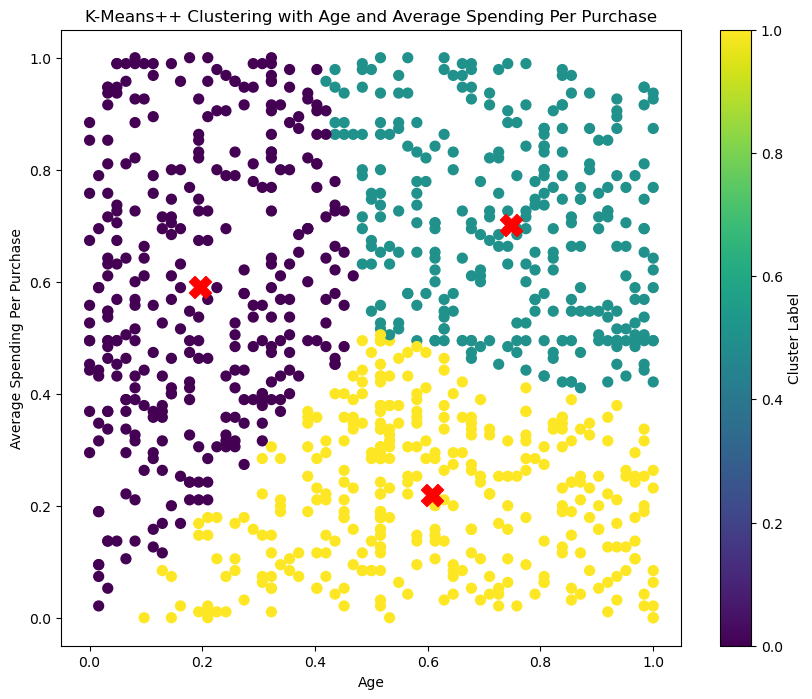

In [338]:
X = IM_df_scaled[['Age', 'Average_Spending_Per_Purchase']].values

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=250, marker='X')

plt.title('K-Means++ Clustering with Age and Average Spending Per Purchase')
plt.xlabel('Age')
plt.ylabel('Average Spending Per Purchase')
plt.colorbar(label='Cluster Label')
plt.show()


In [339]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  
IM_df_scaled['Cluster'] = kmeans.fit_predict(IM_df_scaled[['Purchase_Amount', 'Brand_Affinity_Score', 'Purchase_Frequency_Per_Month']])  # Replace with your actual features

cluster_characteristics = IM_df_scaled.groupby('Cluster').mean()

for cluster_num in range(kmeans.n_clusters):
    print(f"Cluster {cluster_num} characteristics:")
    print(cluster_characteristics.loc[cluster_num])
    print()


c:\Users\Omar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Omar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Cluster 0 characteristics:
Age                                    0.508723
Income_Level                           0.528912
Purchase_Amount                        0.490629
Average_Spending_Per_Purchase          0.481239
Purchase_Frequency_Per_Month           0.830688
Brand_Affinity_Score                   0.383220
Month                                  0.523500
Year                                   0.506225
Year_PD                                0.515873
Month_PM                               0.519481
Gender_Female                          0.336735
Gender_Male                            0.326531
Gender_Other                           0.336735
Product_Category_Books                 0.289116
Product_Category_Clothing              0.323129
Product_Category_Electronics           0.387755
Brand_Brand_A                          0.295918
Brand_Brand_B                          0.357143
Brand_Brand_C                          0.346939
Product_Category_Preferences_High      0.346939
Product_Categ